In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)


In [7]:
#dvcs from simulation, vz correct, vxvy (0, 0), rec
fname = "~/Dropbox (MIT)/data/MC/Feb2021/dvcsRadRECinb.root"
epg = epgFromROOT(fname, rec=True)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=True)
dvcsMCInbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC": epg.df_MC}

In [9]:
print(dvcs.Epx)

37        0.748293
66        0.767048
117      -0.888612
142      -1.218592
148       1.235434
            ...   
680136    1.122661
680202    0.750304
680306    1.300190
680327   -1.350960
680403   -1.134596
Name: Epx, Length: 20297, dtype: float64


In [22]:
f =pd.read_pickle("~/Dropbox (MIT)/data/MC/goodbyeRoot.pkl")

<AxesSubplot:>

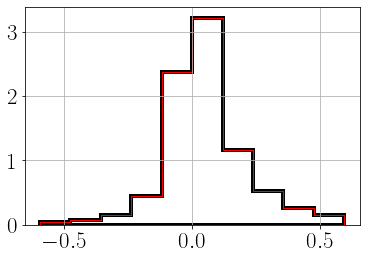

In [32]:
f.MM2_ep.hist(density=True, histtype = 'stepfilled', facecolor = 'None', edgecolor ='k', linewidth =4)
dvcs.MM2_ep.hist(density=True, histtype = 'stepfilled', facecolor = 'None', edgecolor ='r')

In [45]:
fname_gen = "~/Dropbox (MIT)/data/MC/nonradVzCorrInbMC.root"
epg_gen = epgFromROOT(fname_gen, mc=True)
dvcs_gen = epg_gen.getDVCS()

In [7]:
#whenever want to reload libraries
import importlib
import utils
importlib.reload(utils.epg)
from utils.epg import *

In [8]:
#pi0 simulation from Andrey, inb, rec
fname = "~/Dropbox (MIT)/data/MC/dnp/pi0DNPInbREC.root"
epg = epgFromROOT(fname, rec=True)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
pi0MCdnpInbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_ep": epg.df_ep, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC":epg.df_MC}

             Epx       Epy       Epz       Evx       Evy       Evz  Esector  \
17      1.512494 -0.279807  7.038989 -0.130725 -0.666156 -5.396070        1   
19     -1.216084 -0.127031  6.602643  0.008081  0.024389 -4.476044        4   
21     -1.290862 -0.052793  5.241391  0.023487 -0.390694 -3.248646        4   
27     -1.367893 -0.008097  7.640688  0.013719 -0.450317 -1.294980        4   
28     -1.367893 -0.008097  7.640688  0.013719 -0.450317 -1.294980        4   
...          ...       ...       ...       ...       ...       ...      ...   
686688  0.512367  0.903585  6.419405 -0.107223  0.049394 -4.668766        2   
686689  0.512367  0.903585  6.419405 -0.107223  0.049394 -4.668766        2   
686690  0.512367  0.903585  6.419405 -0.107223  0.049394 -4.668766        2   
686691  0.512367  0.903585  6.419405 -0.107223  0.049394 -4.668766        2   
686692  0.512367  0.903585  6.419405 -0.107223  0.049394 -4.668766        2   

         event       Ppx       Ppy  ...         t  

In [9]:
print(len(pi0MCdnpInbCorrected["df_epgg"]))

216771


In [15]:
dvpi0.loc[:, "closeness"] = np.abs(dvpi0.loc[:, "Mpi0"] - .1349766)

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [22]:
dvpi0[dvpi0.event == 2079]

,Epx,Epy,Epz,Evx,Evy,Evz,Esector,event,Ppx,Ppy,...,W,MPt,MM2_ep,MM2_egg,MM2_epgg,ME_epgg,Mpi0,reconPi,Pie,closeness
2722,0.509871,-1.359208,5.226591,-0.276184,-0.095038,-4.254981,6,2079,-0.754722,0.464661,...,2.530572,0.050069,-0.168266,0.951629,-0.008352,0.074887,0.081474,0.908284,4.455677,0.053502
2723,0.509871,-1.359208,5.226591,-0.276184,-0.095038,-4.254981,6,2079,-0.754722,0.464661,...,2.530572,0.045839,-0.168266,0.913319,-0.008745,0.096932,0.084435,0.867481,4.433632,0.050541
2724,0.509871,-1.359208,5.226591,-0.276184,-0.095038,-4.254981,6,2079,-0.754722,0.464661,...,2.530572,0.043994,-0.168266,1.446932,-0.025950,0.509147,0.107836,0.966806,4.021417,0.027140


In [30]:
df_dvpi0 = copy(dvpi0)
df_dvpi0 = df_dvpi0.sort_values(by='closeness', ascending=True)
df_dvpi0 = df_dvpi0.loc[~df_dvpi0.event.duplicated(), :]
df_dvpi0 = df_dvpi0.sort_values(by='event')        
print(df_dvpi0)

             Epx       Epy       Epz       Evx       Evy       Evz  Esector  \
19     -1.216084 -0.127031  6.602643  0.008081  0.024389 -4.476044        4   
21     -1.290862 -0.052793  5.241391  0.023487 -0.390694 -3.248646        4   
40     -0.775992  1.426417  4.710251  0.364114  0.177707 -1.371698        3   
46     -1.400426 -0.377750  6.736140 -0.019230  0.125393 -1.969298        4   
52      1.160523 -0.054197  7.200570  0.015953  0.443883 -0.986613        1   
...          ...       ...       ...       ...       ...       ...      ...   
686612  1.295835  0.643412  3.251173  0.122754 -0.290853 -0.952557        1   
686618 -0.672105 -1.615656  5.337902  0.203078 -0.066279 -3.242499        5   
686623 -0.707191 -1.045462  7.442225 -0.124224  0.098448 -2.331793        5   
686645 -1.241132 -0.025887  7.528742  0.007086  0.011904 -1.931419        4   
686680 -0.711134  1.200579  6.276260 -0.449536 -0.278138 -2.704077        3   

         event       Ppx       Ppy  ...         W  

In [7]:
dvpi0 = pi0MCdnpInbCorrected["dvpi0"]
df_MC = pi0MCdnpInbCorrected["df_MC"]
gam1 = df_MC[df_MC.index%2==0]
gam1 = gam1.reset_index(drop=True)
gam2 = df_MC[df_MC.index%2==1]
gam2 = gam2.reset_index(drop=True)
gam1.loc[:,"MCGpx2"] = gam2.loc[:,"MCGpx"]
gam1.loc[:,"MCGpy2"] = gam2.loc[:,"MCGpy"]
gam1.loc[:,"MCGpz2"] = gam2.loc[:,"MCGpz"]
gam1.loc[:,"MCGe2"] = gam2.loc[:,"MCGe"]
df_MC = gam1
dvpi0 = pd.merge(dvpi0, df_MC, how="inner", on="event")
dvpi0copy = copy(dvpi0)
dvpi0copy.loc[:, "MCGe"] = np.where(dvpi0["MCGe"]>dvpi0["MCGe2"], dvpi0.loc[:, "MCGe"], dvpi0.loc[:, "MCGe2"])
dvpi0copy.loc[:, "MCGe2"] = np.where(dvpi0["MCGe"]>dvpi0["MCGe2"], dvpi0.loc[:, "MCGe2"], dvpi0.loc[:, "MCGe"])
dvpi0 = dvpi0copy
dvpi0["MCPp"] = mag([dvpi0["MCPpx"], dvpi0["MCPpy"], dvpi0["MCPpz"]])
dvpi0["Pp"] = mag([dvpi0["Ppx"], dvpi0["Ppy"], dvpi0["Ppz"]])
dvpi0["MCPpt"] = mag([dvpi0["MCPpx"], dvpi0["MCPpy"], 0])
dvpi0["Ppt"] = mag([dvpi0["Ppx"], dvpi0["Ppy"], 0])
dvpi01 = dvpi0[dvpi0.Ptheta<27]
dvpi02 = dvpi0[dvpi0.Ptheta>=27]
# dvpi02 = dvpi02[dvpi02["MCPp"]-dvpi02["Pp"]<0.1]
# dvpi02 = dvpi02[dvpi02["MCPp"]-dvpi02["Pp"]>-0.025]
# dvpi02 = dvpi02[np.abs(dvpi02["MCPp"]-dvpi02["Pp"]-correction(res_lsq, dvpi02["Pp"]))<0.02]

Text(0.5, 0, '$p$ [GeV]')

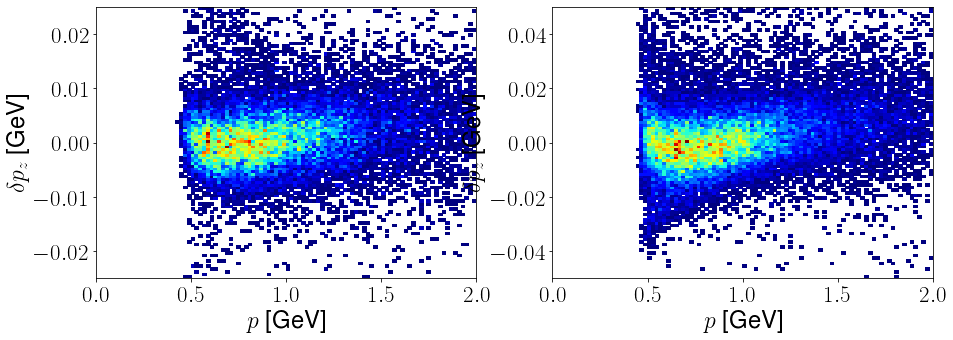

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist2d(dvpi01.Pp, (dvpi01["MCPp"]-dvpi01["Pp"]), bins = [np.linspace(0,2, 101), np.linspace(-0.025 , 0.025, 101)], cmin = 1, cmap = cmap)
# ax[0].plot(np.linspace(0, 2, 101), correction1(np.linspace(0, 2, 101)), color='k', linewidth=4)
ax[0].set_ylabel("$\delta p_z$"+ " [" + GeV + "]")
ax[0].set_xlabel("$p$"+ " [" + GeV + "]")

ax[1].hist2d(dvpi02.Pp, (dvpi02["MCPp"]-dvpi02["Pp"]), bins = [np.linspace(0,2, 101), np.linspace(-0.05 , 0.05, 101)], cmin = 1, cmap = cmap)
# ax[1].plot(np.linspace(0, 2, 101), correction2(np.linspace(0, 2, 101)), color='k', linewidth=4)
ax[1].set_ylabel("$\delta p_z$"+ " [" + GeV + "]")
ax[1].set_xlabel("$p$"+ " [" + GeV + "]")


Text(0.5, 0, '$p$ [GeV]')

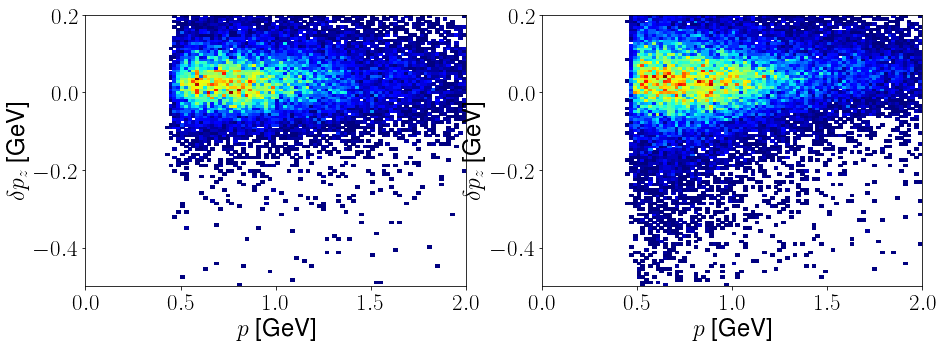

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist2d(dvpi01.Pp, dvpi01.MM2_ep, bins = [np.linspace(0,2, 101), np.linspace(-0.5 , 0.2, 101)], cmin = 1, cmap = cmap)
# ax[0].plot(np.linspace(0, 2, 101), correction1(np.linspace(0, 2, 101)), color='k', linewidth=4)
ax[0].set_ylabel("$\delta p_z$"+ " [" + GeV + "]")
ax[0].set_xlabel("$p$"+ " [" + GeV + "]")

ax[1].hist2d(dvpi02.Pp, dvpi02.MM2_ep, bins = [np.linspace(0,2, 101), np.linspace(-0.5 , 0.2, 101)], cmin = 1, cmap = cmap)
# ax[1].plot(np.linspace(0, 2, 101), correction2(np.linspace(0, 2, 101)), color='k', linewidth=4)
ax[1].set_ylabel("$\delta p_z$"+ " [" + GeV + "]")
ax[1].set_xlabel("$p$"+ " [" + GeV + "]")


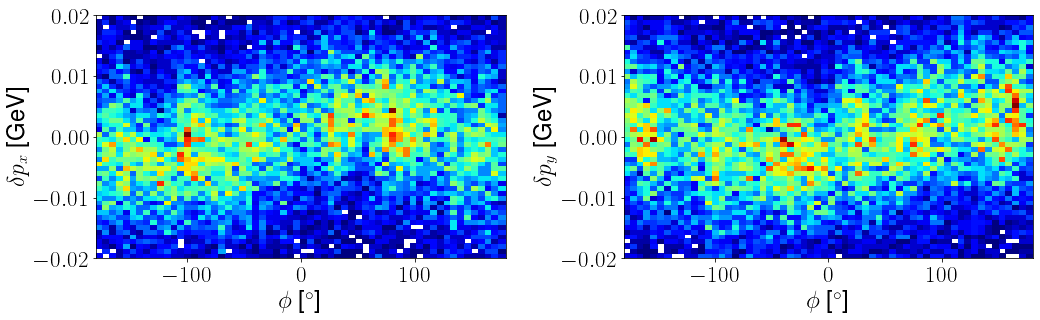

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist2d(dvpi02.loc[:, "Pphi"], dvpi02.loc[:, "MCPpx"] - dvpi02.loc[:, "Ppx"], bins = [np.linspace(-180, 180, 61), np.linspace(-0.02, 0.02 , 51)], cmap = cmap, cmin =1)
# ax[0].plot(np.linspace(-180, 180, 101), correction3(np.linspace(-180, 180, 101)), color='k', linewidth=4)
ax[0].set_ylabel("$\delta p_{x}$"+ " [" + GeV + "]")
ax[0].set_xlabel("$\phi$"+ " [" + degree + "]")

ax[1].hist2d(dvpi02.loc[:, "Pphi"], dvpi02.loc[:, "MCPpy"] - dvpi02.loc[:, "Ppy"], bins = [np.linspace(-180, 180, 61), np.linspace(-0.02, 0.02 , 51)], cmap = cmap, cmin =1)
# ax[1].plot(np.linspace(-180, 180, 101), correction4(np.linspace(-180, 180, 101)), color='k', linewidth=4)
ax[1].set_ylabel("$\delta p_y$"+ " [" + GeV + "]")
ax[1].set_xlabel("$\phi$"+ " [" + degree + "]")

plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [8]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/dvcs_inb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
dvcsExpInbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

In [183]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/dvcs_inb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0(correction=False)
dvcs = epg.getDVCS(correction=False, sub2g=True)
dvcsExpInb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

In [116]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/pi0_inb.root"
epg = epgFromROOT(fname, entry_stop = 10000)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
pi0ExpInbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

True
580


In [117]:
print(len(pi0ExpInbCorrected["df_epgg"]))

9542


In [118]:
print(len(dvpi0))

580


In [119]:
len(dvpi0.event.unique())

575

In [63]:
dvpi0copy = copy(dvpi0)

In [96]:
dvpi0.loc[~dvpi0.event.duplicated(), :].Epz

0        4.711491
4        6.373712
80       6.506361
86       7.380778
144      5.964839
           ...   
17073    6.112871
17113    4.741045
17177    5.223145
17252    6.143281
17254    4.302100
Name: Epz, Length: 577, dtype: float64

In [57]:
2324442/2649919

0.8771747362843921

In [187]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/pi0_inb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0(correction=False)
dvcs = epg.getDVCS(correction=False, sub2g=False)
pi0ExpInb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

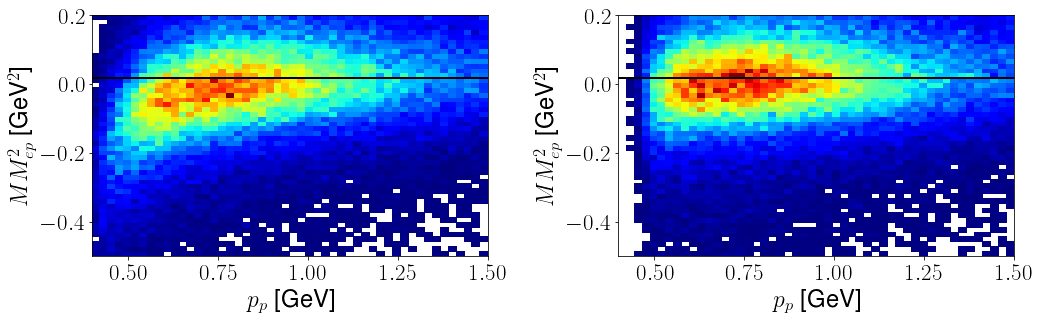

In [190]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist2d(pi0ExpInb["dvpi0"].Pp, (pi0ExpInb["dvpi0"].MM2_ep), bins = [np.linspace(0.4, 1.5, 51), np.linspace(-0.5 , 0.2, 51)], cmap=cmap, cmin = 1)
# ax[0].plot(np.linspace(0, 2, 101), correction1(np.linspace(0, 2, 101)), color='k', linewidth=4)
ax[0].axhline(0.135**2, color = 'k', linewidth = 2)
ax[0].set_ylabel("$MM^2_{ep}$"+ " [" + GeV2 + "]")
ax[0].set_xlabel("$p_p$"+ " [" + GeV + "]")

ax[1].hist2d(pi0ExpInbCorrected["dvpi0"].Pp, (pi0ExpInbCorrected["dvpi0"].MM2_ep), bins = [np.linspace(0.4, 1.5, 51), np.linspace(-0.5 , 0.2, 51)], cmap=cmap, cmin = 1)
# ax[1].plot(np.linspace(0, 2, 101), correction2(np.linspace(0, 2, 101)), color='k', linewidth=4)
ax[1].axhline(0.135**2, color = 'k', linewidth = 2)
ax[1].set_ylabel("$MM^2_{ep}$"+ " [" + GeV2 + "]")
ax[1].set_xlabel("$p_p$"+ " [" + GeV + "]")
plt.tight_layout()
plt.savefig("analysisnote/protonCorrresult.pdf")

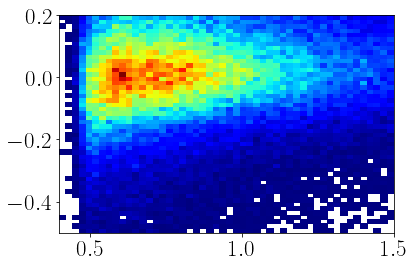

In [12]:
plt.hist2d(dvcsExpInbCorrected["dvcs"].Pp, dvcsExpInbCorrected["dvcs"].MM2_ep, bins = [np.linspace(0.4, 1.5, 51), np.linspace(-0.5 , 0.2, 51)], cmap=cmap, cmin = 1)
plt.show()

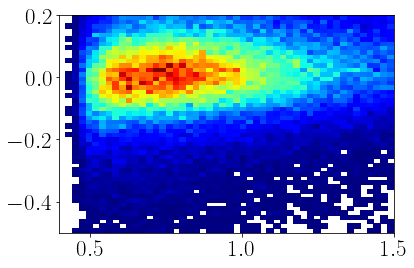

In [13]:
plt.hist2d(pi0ExpInbCorrected["dvpi0"].Pp, pi0ExpInbCorrected["dvpi0"].MM2_ep, bins = [np.linspace(0.4, 1.5, 51), np.linspace(-0.5 , 0.2, 51)], cmap=cmap, cmin = 1)
plt.show()

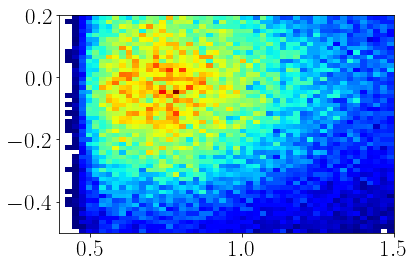

In [14]:
plt.hist2d(pi0ExpInbCorrected["dvpi0"].Pp, pi0ExpInbCorrected["dvpi0"].ME_epgg, bins = [np.linspace(0.4, 1.5, 51), np.linspace(-0.5 , 0.2, 51)], cmap=cmap, cmin = 1)
plt.show()

In [11]:
dvpi0Indvpi0SimInb = pi0MCdnpInbCorrected["dvpi0"]
alldvcsIndvpi0SimInb = pi0MCdnpInbCorrected["dvcs"]
onlydvcsIndvpi0SimInb = alldvcsIndvpi0SimInb[~alldvcsIndvpi0SimInb["event"].isin(dvpi0Indvpi0SimInb["event"])]
alldvcsIndataInb = dvcsExpInbCorrected["dvcs"]
onlydvcsIndataInb = alldvcsIndataInb[~alldvcsIndataInb["event"].isin(dvcsExpInbCorrected["dvpi0"]["event"])]
dvpi0IndataInb = pi0ExpInbCorrected["dvpi0"]

print(len(onlydvcsIndataInb["event"].unique()), len(dvpi0IndataInb["event"].unique()), len(dvpi0IndataInb["event"].unique())* len(onlydvcsIndvpi0SimInb["event"].unique())/len(dvpi0Indvpi0SimInb["event"].unique()))
cont_inb = len(dvpi0IndataInb["event"].unique())* len(onlydvcsIndvpi0SimInb["event"].unique())/len(dvpi0Indvpi0SimInb["event"].unique())/len(onlydvcsIndataInb["event"].unique())
print(cont_inb)
print("the number of dvcs candidates in Inbending: ", len(onlydvcsIndataInb["event"].unique()) - len(dvpi0IndataInb["event"].unique())* len(onlydvcsIndvpi0SimInb["event"].unique())/len(dvpi0Indvpi0SimInb["event"].unique()))

onlydvcsIndvcsSimInb = dvcsMCInbCorrected["dvcs"] 


111827 135842 40167.937445793585
0.3591971299041697
the number of dvcs candidates in Inbending:  71659.06255420641


In [ ]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [None, None, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [0, 2, 0, 0, 0, 0]
binends = [10, 4, 10, 1, 1.7, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
	for yind in range(0, 2):
		ind =xind+3*yind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 51)
		simDist_dvpi0, bins = np.histogram(onlydvcsIndvpi0SimInb[varstoplot[ind]], bins, density = True)
		simDist_dvcs, bins = np.histogram(onlydvcsIndvcsSimInb[varstoplot[ind]], bins, density = True)
		simDist = cont_inb*simDist_dvpi0 + (1-cont_inb)*simDist_dvcs
		bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
		axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
		axs[yind, xind].bar(bincenters, simDist, width=np.diff(bins), color = 'w', facecolor='w')
		axs[yind, xind].step(bincenters, cont_inb*simDist_dvpi0, where='mid',color='g', linewidth=1)
		axs[yind, xind].bar(bincenters, cont_inb*simDist_dvpi0, width=np.diff(bins), color = 'w', facecolor='w')
		axs[yind, xind].step(bincenters, (1-cont_inb)*simDist_dvcs, where='mid',color='r', linewidth=1)
		axs[yind, xind].bar(bincenters, (1-cont_inb)*simDist_dvcs, width=np.diff(bins), color = 'w', facecolor='w')
		axs[yind, xind].hist(onlydvcsIndataInb[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=4)
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlim([start, end])
		if (unit[ind]):
			axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs[yind, xind].set_xlabel(title[ind])
axs[1,1].set_xticks([0, 1, 1.7])
axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
plt.show()
# plt.savefig("analysisnote/inbending1.pdf")
plt.clf()

In [ ]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\gamma}$", "MM"+r"${}^{2}_{ep\gamma}$", "MM"+r"${}^{2}_{e\gamma}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
binends = [60, 1.5, 10, 1.5, 0.04, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
	for xind in range(0,4):
		ind = 4*yind + xind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 51)
		simDist_dvpi0, bins = np.histogram(onlydvcsIndvpi0SimInb[varstoplot[ind]], bins, density = True)
		simDist_dvcs, bins = np.histogram(onlydvcsIndvcsSimInb[varstoplot[ind]], bins, density = True)
		simDist = cont_inb*simDist_dvpi0 + (1-cont_inb)*simDist_dvcs
		bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
		axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
		axs[yind, xind].step(bincenters, cont_inb*simDist_dvpi0, where='mid',color='g', linewidth=1)
		axs[yind, xind].step(bincenters, (1-cont_inb)*simDist_dvcs, where='mid',color='r', linewidth=1)
		axs[yind, xind].hist(onlydvcsIndataInb[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=4)
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlim([start, end])
		if (unit[ind]):
			axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
axs[0,1].set_xticks([0, 0.5, 1, 1.5])
axs[0, -1].set_xticks([-0.5, 0.5, 1.5])
axs[1, 0].set_xticks([-0.04, 0, 0.04])
axs[1, 1].set_xticks([0.1, 1, 1.7])
axs[1, 2].set_xticks([-0.4, 0, 0.4])

plt.show()
# plt.savefig("analysisnote/inbending2.pdf")
plt.clf()

In [159]:
#pi0 simulation from Andrey, inb, rec
fname = "~/Dropbox (MIT)/data/MC/dnp/pi0DNPOutbREC.root"
epg = epgFromROOT(fname, rec=True)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
pi0MCdnpOutbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_ep": epg.df_ep, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC":epg.df_MC}

In [160]:
dvpi0 = pi0MCdnpOutbCorrected["dvpi0"]
df_MC = pi0MCdnpOutbCorrected["df_MC"]
gam1 = df_MC[df_MC.index%2==0]
gam1 = gam1.reset_index(drop=True)
gam2 = df_MC[df_MC.index%2==1]
gam2 = gam2.reset_index(drop=True)
gam1.loc[:,"MCGpx2"] = gam2.loc[:,"MCGpx"]
gam1.loc[:,"MCGpy2"] = gam2.loc[:,"MCGpy"]
gam1.loc[:,"MCGpz2"] = gam2.loc[:,"MCGpz"]
gam1.loc[:,"MCGe2"] = gam2.loc[:,"MCGe"]
df_MC = gam1
dvpi0 = pd.merge(dvpi0, df_MC, how="inner", on="event")
dvpi0copy = copy(dvpi0)
dvpi0copy.loc[:, "MCGe"] = np.where(dvpi0["MCGe"]>dvpi0["MCGe2"], dvpi0.loc[:, "MCGe"], dvpi0.loc[:, "MCGe2"])
dvpi0copy.loc[:, "MCGe2"] = np.where(dvpi0["MCGe"]>dvpi0["MCGe2"], dvpi0.loc[:, "MCGe2"], dvpi0.loc[:, "MCGe"])
dvpi0 = dvpi0copy
dvpi0["MCPp"] = mag([dvpi0["MCPpx"], dvpi0["MCPpy"], dvpi0["MCPpz"]])
dvpi0["Pp"] = mag([dvpi0["Ppx"], dvpi0["Ppy"], dvpi0["Ppz"]])
dvpi0["MCPpt"] = mag([dvpi0["MCPpx"], dvpi0["MCPpy"], 0])
dvpi0["Ppt"] = mag([dvpi0["Ppx"], dvpi0["Ppy"], 0])
dvpi01 = dvpi0[dvpi0.Ptheta<27]
dvpi02 = dvpi0[dvpi0.Ptheta>=27]
# dvpi02 = dvpi02[dvpi02["MCPp"]-dvpi02["Pp"]<0.1]
# dvpi02 = dvpi02[dvpi02["MCPp"]-dvpi02["Pp"]>-0.025]
# dvpi02 = dvpi02[np.abs(dvpi02["MCPp"]-dvpi02["Pp"]-correction(res_lsq, dvpi02["Pp"]))<0.02]

Text(0.5, 0, '$p$ [GeV]')

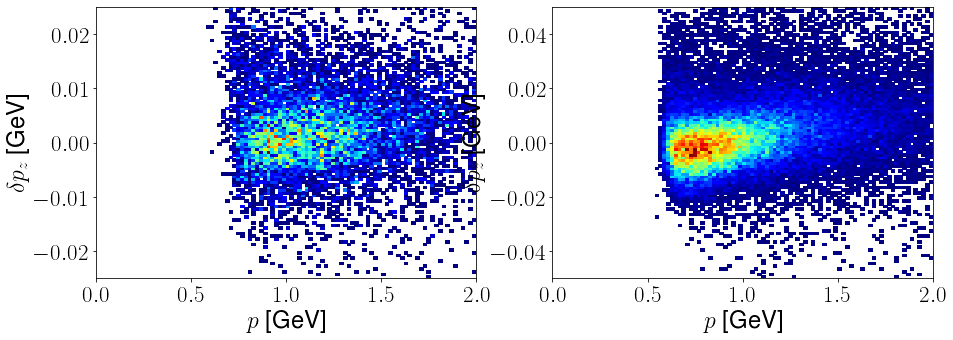

In [161]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist2d(dvpi01.Pp, (dvpi01["MCPp"]-dvpi01["Pp"]), bins = [np.linspace(0,2, 101), np.linspace(-0.025 , 0.025, 101)], cmin = 1, cmap = cmap)
# ax[0].plot(np.linspace(0, 2, 101), correction1(np.linspace(0, 2, 101)), color='k', linewidth=4)
ax[0].set_ylabel("$\delta p_z$"+ " [" + GeV + "]")
ax[0].set_xlabel("$p$"+ " [" + GeV + "]")

ax[1].hist2d(dvpi02.Pp, (dvpi02["MCPp"]-dvpi02["Pp"]), bins = [np.linspace(0,2, 101), np.linspace(-0.05 , 0.05, 101)], cmin = 1, cmap = cmap)
# ax[1].plot(np.linspace(0, 2, 101), correction2(np.linspace(0, 2, 101)), color='k', linewidth=4)
ax[1].set_ylabel("$\delta p_z$"+ " [" + GeV + "]")
ax[1].set_xlabel("$p$"+ " [" + GeV + "]")


In [162]:
#dvcs from simulation, vz correct, vxvy (0, 0), rec
fname = "~/Dropbox (MIT)/data/MC/nonradVxyzCorrOutbREC.root"
epg = epgFromROOT(fname, rec=True)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
dvcsMCOutbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC": epg.df_MC}

In [163]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/dvcs_outb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
dvcsExpOutbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

In [164]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/pi0_outb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
pi0ExpOutbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

In [165]:
dvpi0Indvpi0SimOutb = pi0MCdnpOutbCorrected["dvpi0"]
alldvcsIndvpi0SimOutb = pi0MCdnpOutbCorrected["dvcs"]
onlydvcsIndvpi0SimOutb = alldvcsIndvpi0SimOutb[~alldvcsIndvpi0SimOutb["event"].isin(dvpi0Indvpi0SimOutb["event"])]
alldvcsIndataOutb = dvcsExpOutbCorrected["dvcs"]
onlydvcsIndataOutb = alldvcsIndataOutb[~alldvcsIndataOutb["event"].isin(dvcsExpOutbCorrected["dvpi0"]["event"])]
dvpi0IndataOutb = pi0ExpOutbCorrected["dvpi0"]

print(len(onlydvcsIndataOutb["event"].unique()), len(dvpi0IndataOutb["event"].unique()), len(dvpi0IndataOutb["event"].unique())* len(onlydvcsIndvpi0SimOutb["event"].unique())/len(dvpi0Indvpi0SimOutb["event"].unique()))
cont_Outb = len(dvpi0IndataOutb["event"].unique())* len(onlydvcsIndvpi0SimOutb["event"].unique())/len(dvpi0Indvpi0SimOutb["event"].unique())/len(onlydvcsIndataOutb["event"].unique())
print(cont_Outb)
print("the number of dvcs candidates in Outbending: ", len(onlydvcsIndataOutb["event"].unique()) - len(dvpi0IndataOutb["event"].unique())* len(onlydvcsIndvpi0SimOutb["event"].unique())/len(dvpi0Indvpi0SimOutb["event"].unique()))

onlydvcsIndvcsSimOutb = dvcsMCOutbCorrected["dvcs"] 


97215 155037 40600.08108995404
0.41763185814898973
the number of dvcs candidates in Outbending:  56614.91891004596


In [196]:
onlydvcsIndvcsSim = dvcsMCOutbCorrected["dvcs"] 
# onlydvcsIndvcsSim = onlydvcsIndvcsSim[onlydvcsIndvcsSim["t2"]<1.7]

varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [None, None, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [0, 2, 0, 0, 0, 0]
binends = [10, 4, 10, 1, 1.7, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
	for yind in range(0, 2):
		ind =xind+3*yind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 51)
		simDist_dvpi0, bins = np.histogram(onlydvcsIndvpi0SimOutb[varstoplot[ind]], bins, density = True)
		simDist_dvcs, bins = np.histogram(onlydvcsIndvcsSimOutb[varstoplot[ind]], bins, density = True)
		simDist = cont_Outb*simDist_dvpi0 + (1-cont_Outb)*simDist_dvcs
		bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
		axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
		axs[yind, xind].bar(bincenters, simDist, width=np.diff(bins), color = 'w', facecolor='w')
		axs[yind, xind].step(bincenters, cont_Outb*simDist_dvpi0, where='mid',color='g', linewidth=1)
		axs[yind, xind].bar(bincenters, cont_Outb*simDist_dvpi0, width=np.diff(bins), color = 'w', facecolor='w')
		axs[yind, xind].step(bincenters, (1-cont_Outb)*simDist_dvcs, where='mid',color='r', linewidth=1)
		axs[yind, xind].bar(bincenters, (1-cont_Outb)*simDist_dvcs, width=np.diff(bins), color = 'w', facecolor='w')
		axs[yind, xind].hist(onlydvcsIndataOutb[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=4)
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlim([start, end])
		if (unit[ind]):
			axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.show()
plt.savefig("analysisnote/outbending1.pdf")
plt.clf()

<Figure size 1080x720 with 0 Axes>

In [195]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
	for xind in range(0,4):
		ind = 4*yind + xind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 51)
		simDist_dvpi0, bins = np.histogram(onlydvcsIndvpi0SimOutb[varstoplot[ind]], bins, density = True)
		simDist_dvcs, bins = np.histogram(onlydvcsIndvcsSimOutb[varstoplot[ind]], bins, density = True)
		simDist = cont_Outb*simDist_dvpi0 + (1-cont_Outb)*simDist_dvcs
		bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
		axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
		axs[yind, xind].step(bincenters, cont_Outb*simDist_dvpi0, where='mid',color='g', linewidth=1)
		axs[yind, xind].step(bincenters, (1-cont_Outb)*simDist_dvcs, where='mid',color='r', linewidth=1)
		axs[yind, xind].hist(onlydvcsIndataOutb[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=4)
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlim([start, end])
		if (unit[ind]):
			axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
# plt.show()
plt.savefig("analysisnote/outbending2.pdf")
plt.clf()

<Figure size 1080x720 with 0 Axes>

In [143]:
xB_edges = [0.1, 0.4, 0.85]
Q2_edges = [1, 3, 5, 7, 9]
t_edges = [0.2, 0.3, 0.4, 0.60, 1.00, 2.0]
phi_edges = np.linspace(0, 360, 13)


In [144]:
def dfInOneBin(df, xBind, Q2ind, tind):
    binQ2lower = df["Q2"] > Q2_edges[Q2ind]
    binQ2upper = df["Q2"] < Q2_edges[Q2ind + 1]
    binxBlower = df["xB"] > xB_edges[xBind]
    binxBupper = df["xB"] < xB_edges[xBind + 1]
    bintlower = df["t2"] > t_edges[tind]
    bintupper = df["t2"] < t_edges[tind + 1]
    return df[binQ2lower & binQ2upper &
              binxBlower & binxBupper & bintlower & bintupper]

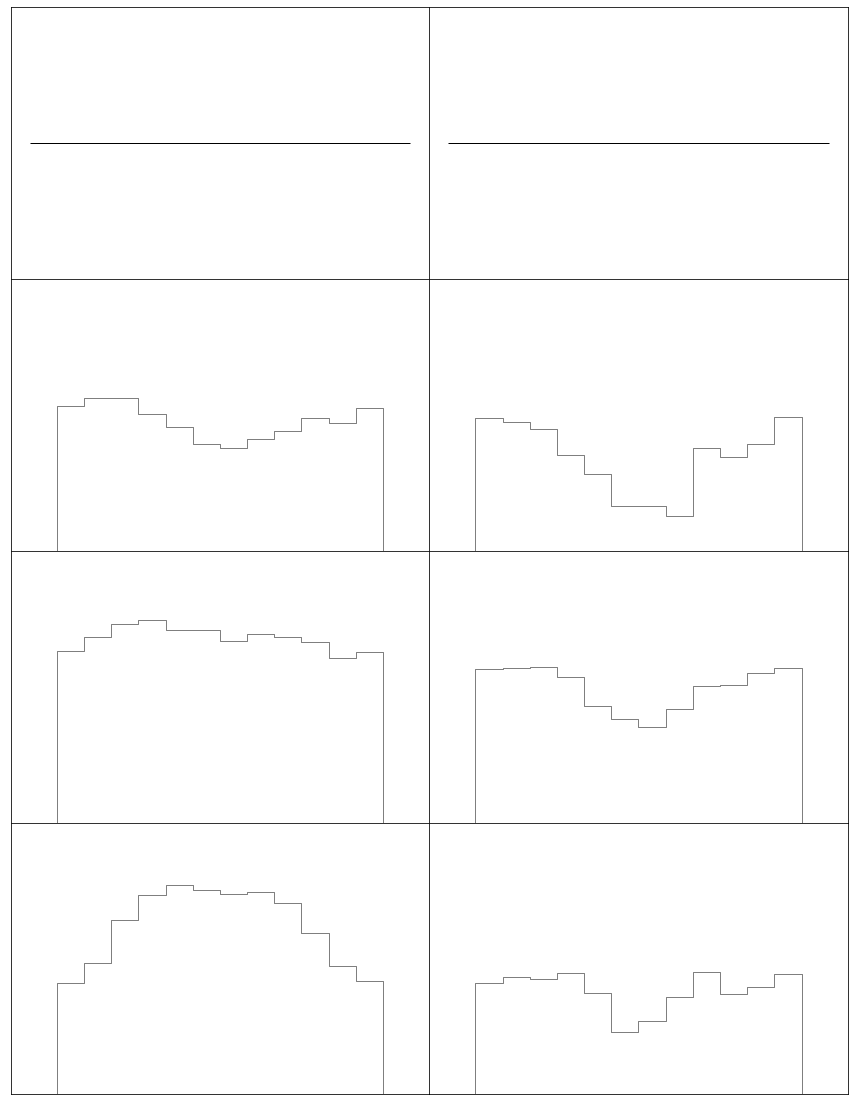

<Figure size 432x288 with 0 Axes>

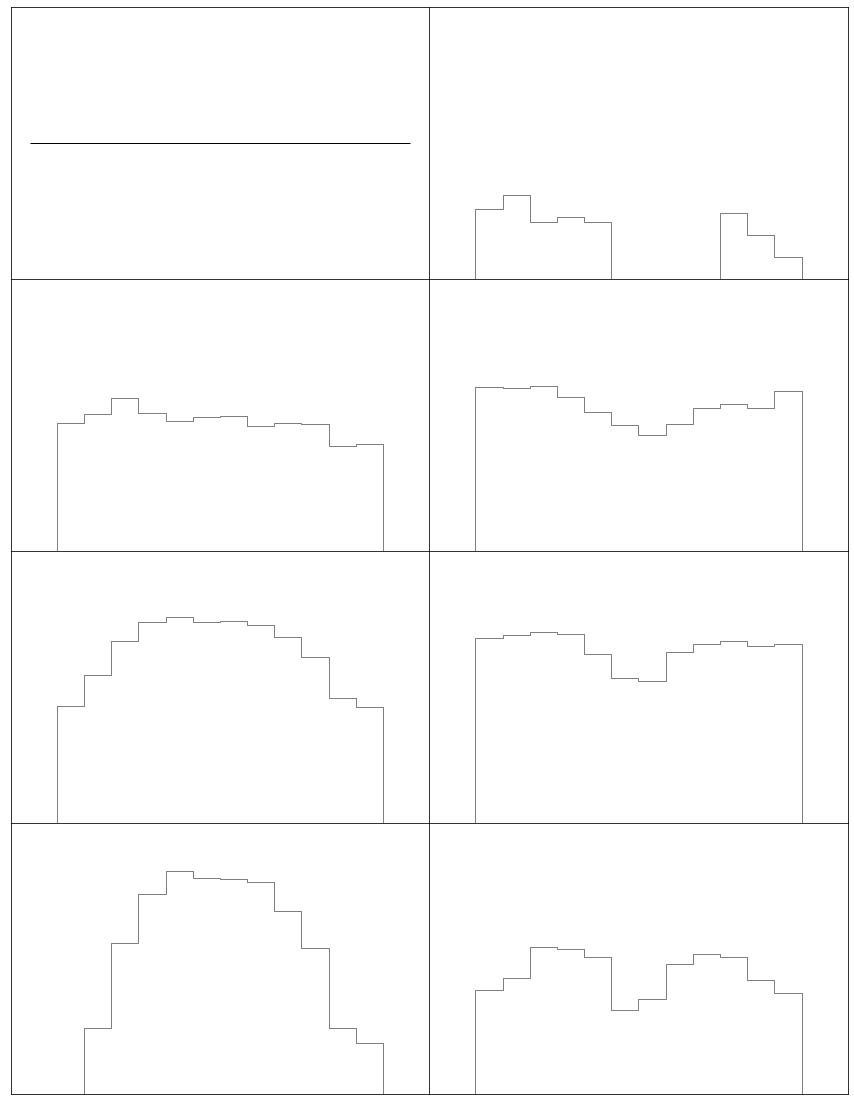

<Figure size 432x288 with 0 Axes>

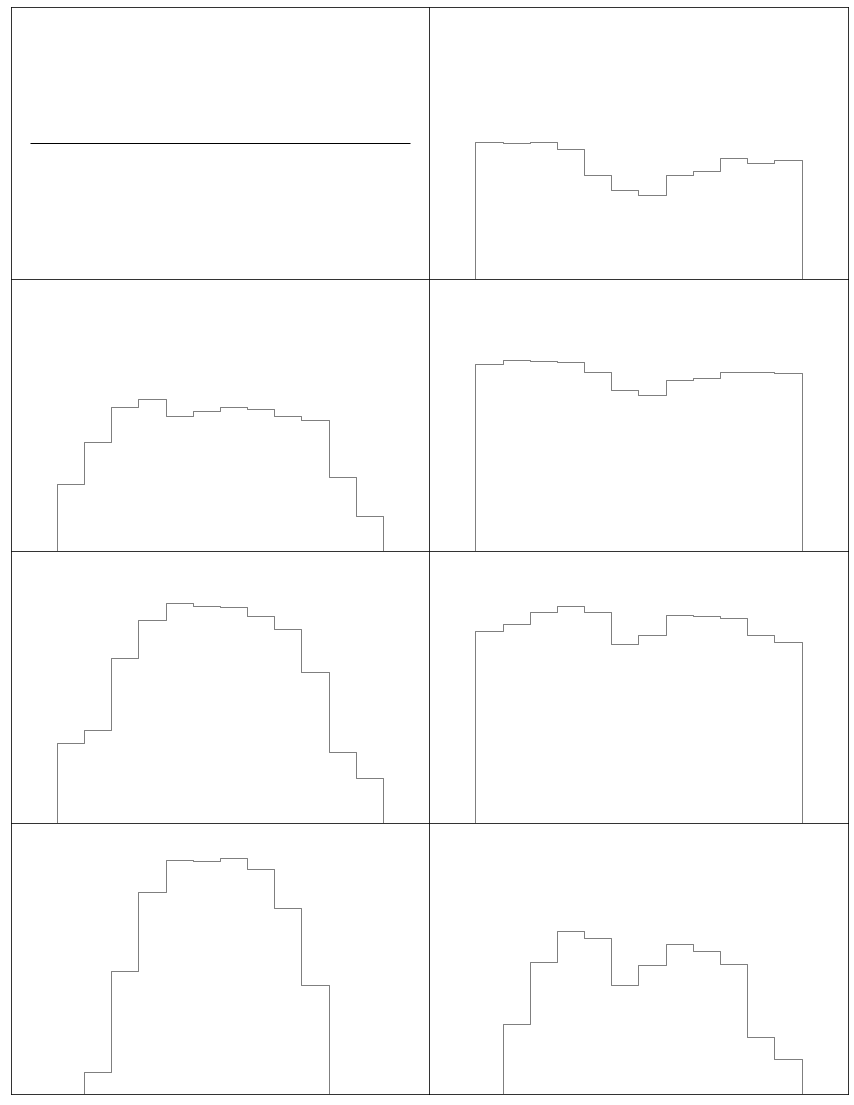

<Figure size 432x288 with 0 Axes>

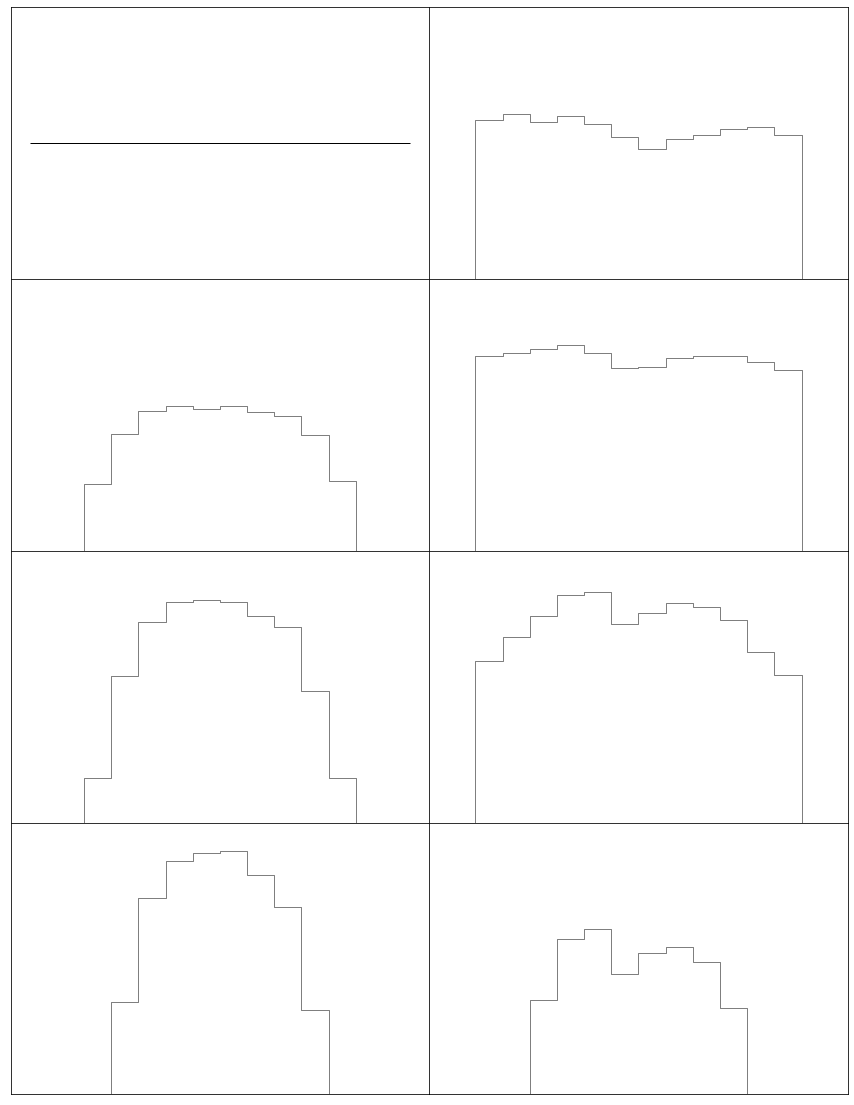

<Figure size 432x288 with 0 Axes>

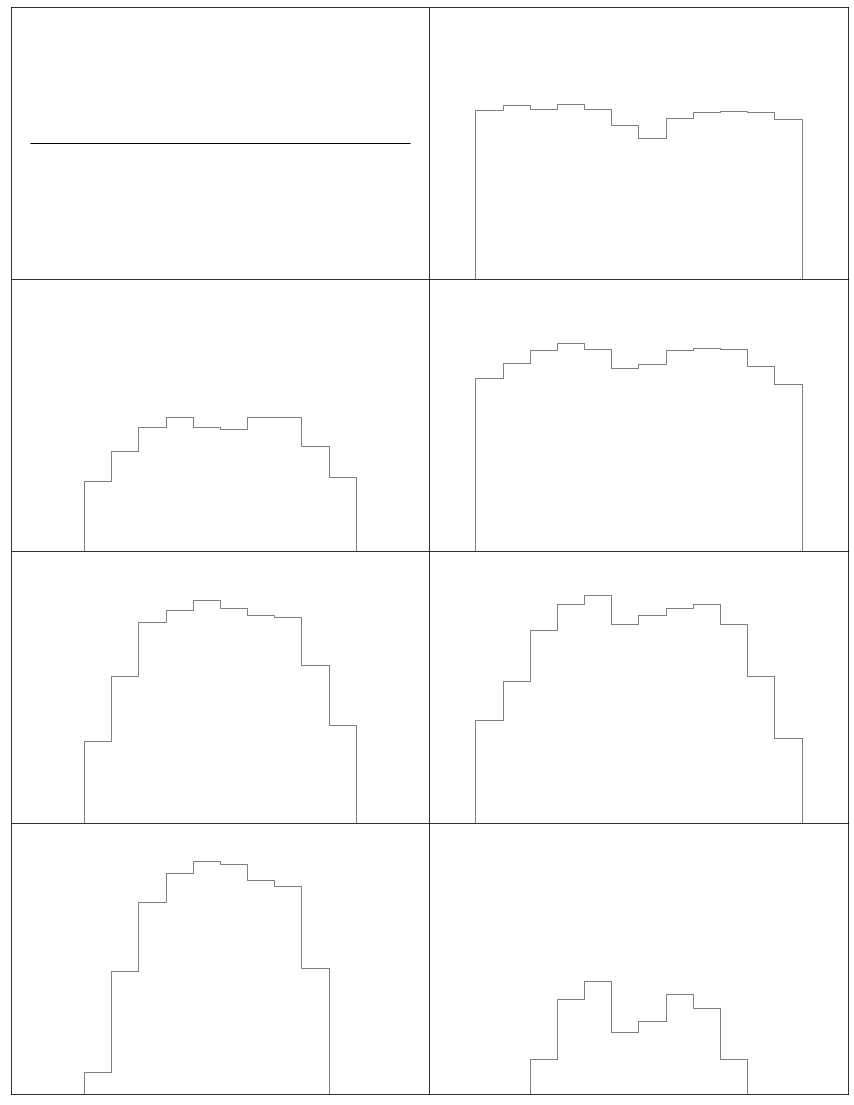

<Figure size 432x288 with 0 Axes>

In [150]:
df = onlydvcsIndataInb

for tind in range(0, len(t_edges) - 1):
    fig, axs = plt.subplots(len(Q2_edges) - 1, len(xB_edges) - 1, figsize = (15, 20))
    for xBind in range(0, len(xB_edges) - 1):
        for Q2ind in range(0, len(Q2_edges) - 1):
            plt.setp(axs[len(Q2_edges) - 2 - Q2ind,
                         xBind].get_xticklabels(), visible=False)
            plt.setp(axs[len(Q2_edges) - 2 - Q2ind,
                         xBind].get_yticklabels(), visible=False)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_title("")
            axs[len(Q2_edges) - 2 - Q2ind, xBind].xaxis.set_visible(False)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].yaxis.set_visible(False)

            df_plotted = dfInOneBin(df, xBind, Q2ind, tind)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].hist(df_plotted["phi2"],
                            bins=phi_edges, linewidth=0.5, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[len(Q2_edges)-2-Q2ind,xBind].set_xticks([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_yticks([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_xticklabels([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_yticklabels([])
            if (len(df_plotted)==0):
              continue

            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_ylim([1, 5000])
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_yscale('log')
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_title("")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tick_params(axis='both', labelsize=0, length=0)
    # plt.savefig("dvcs_{}.pdf".format(tind))
    plt.show()
    plt.clf()

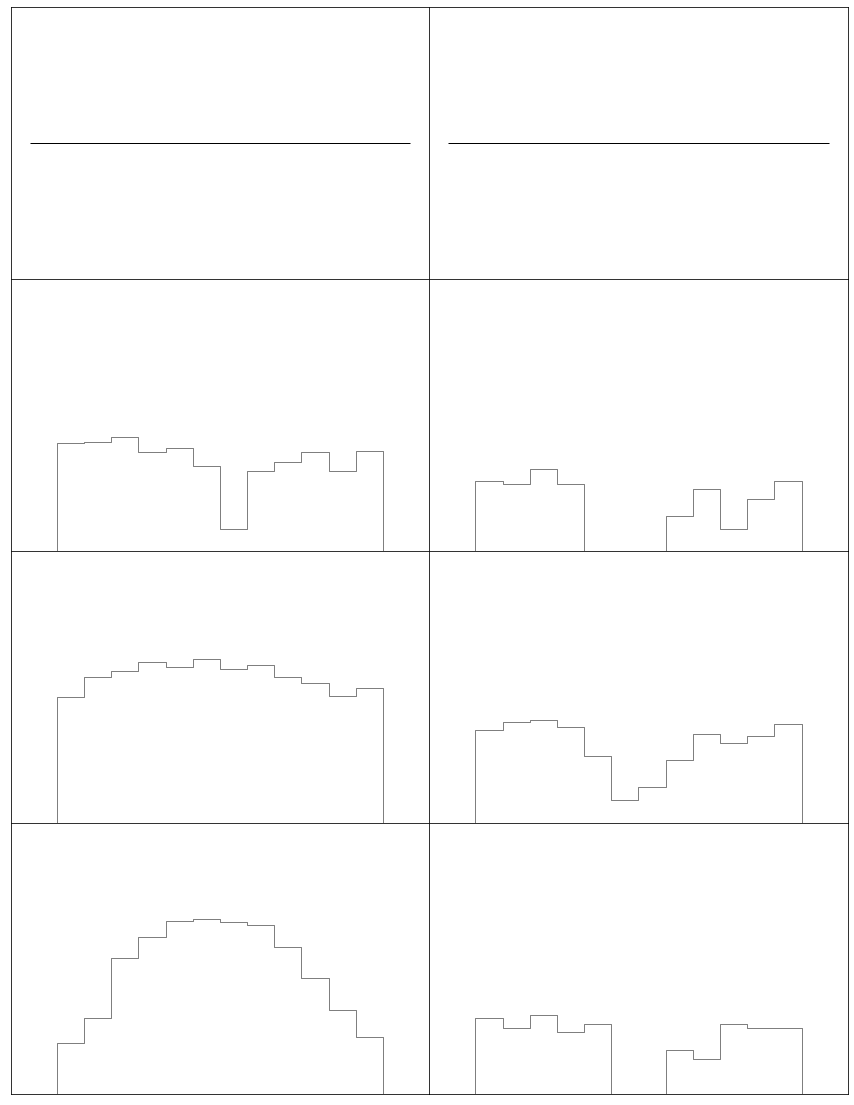

<Figure size 432x288 with 0 Axes>

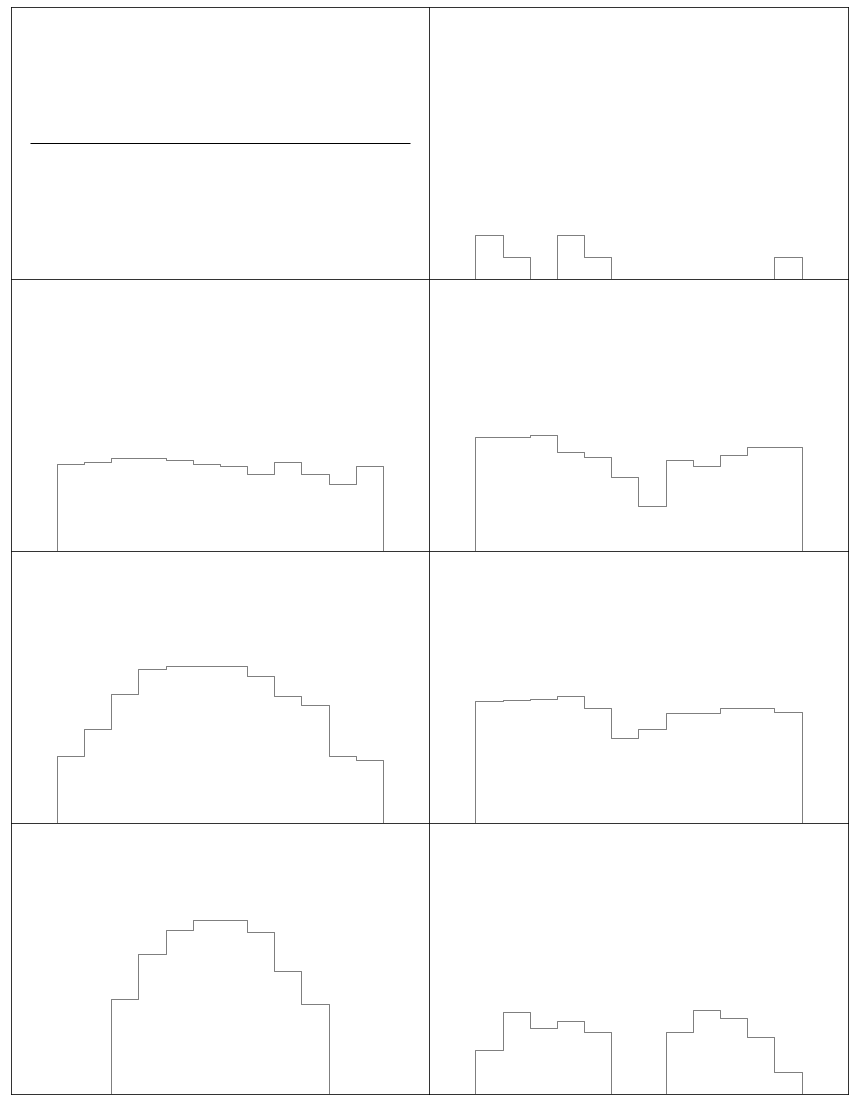

<Figure size 432x288 with 0 Axes>

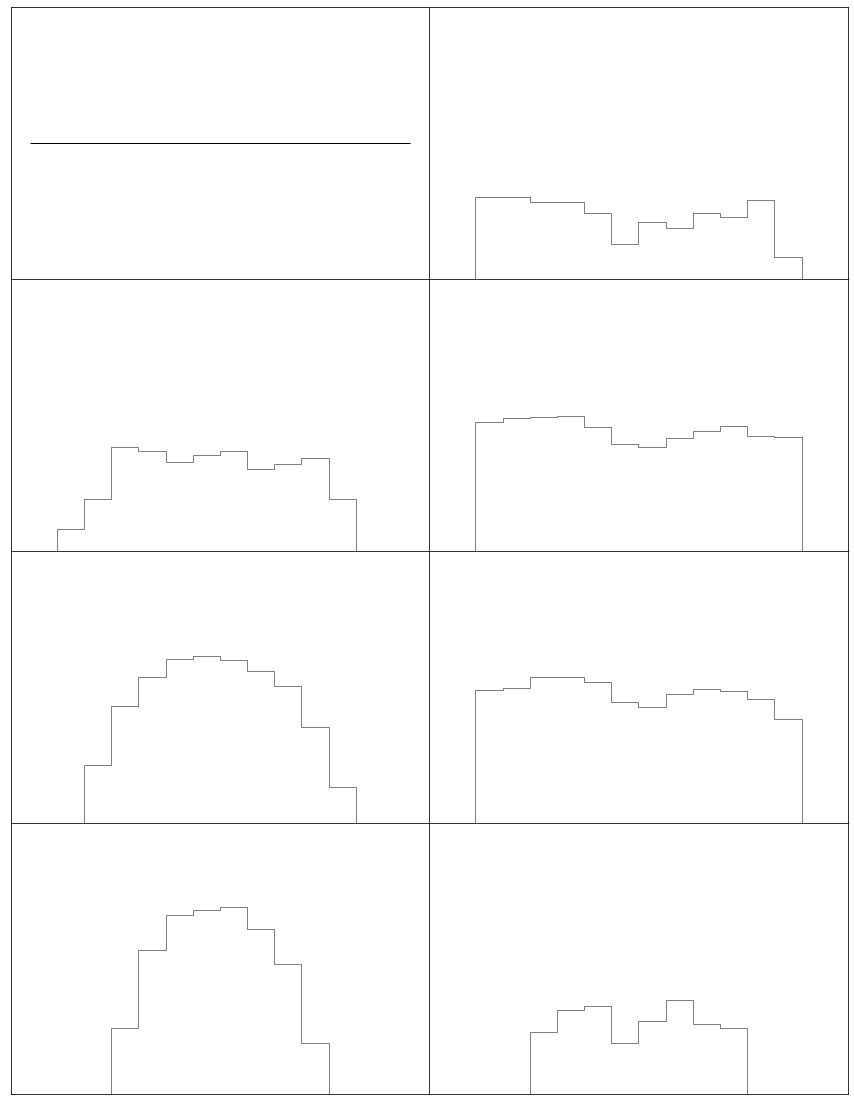

<Figure size 432x288 with 0 Axes>

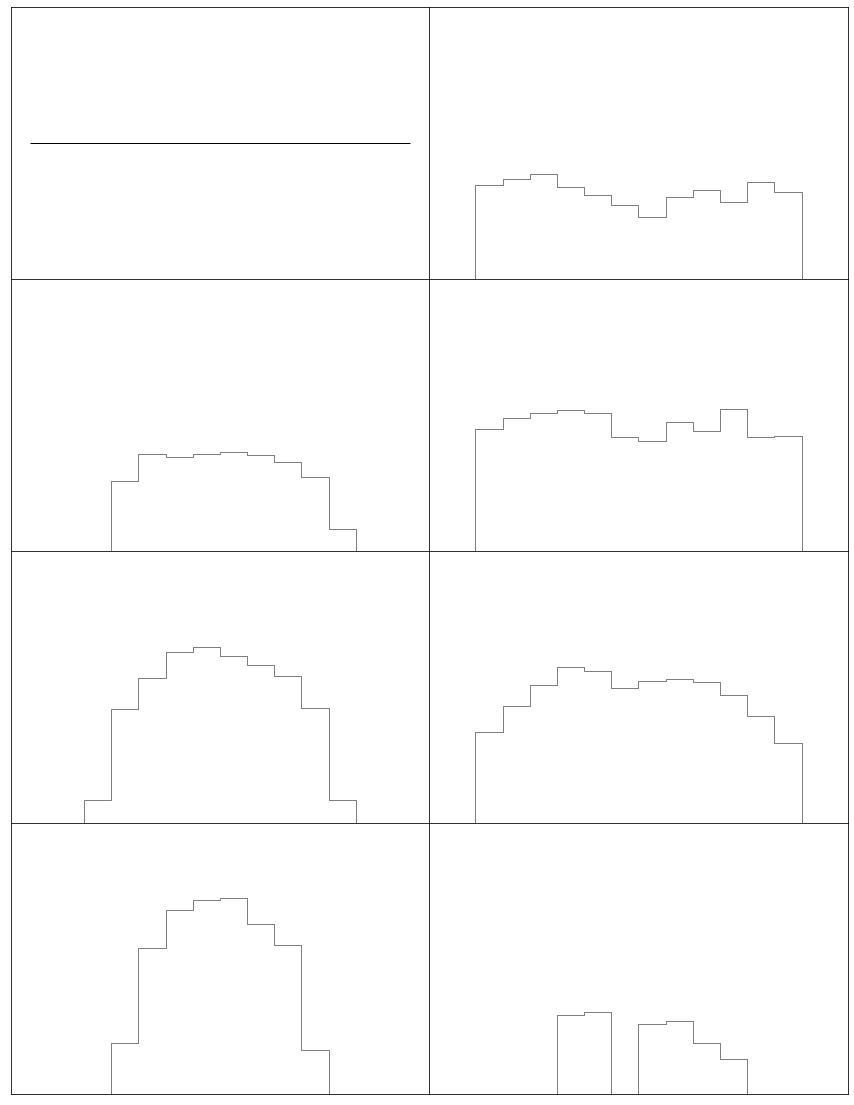

<Figure size 432x288 with 0 Axes>

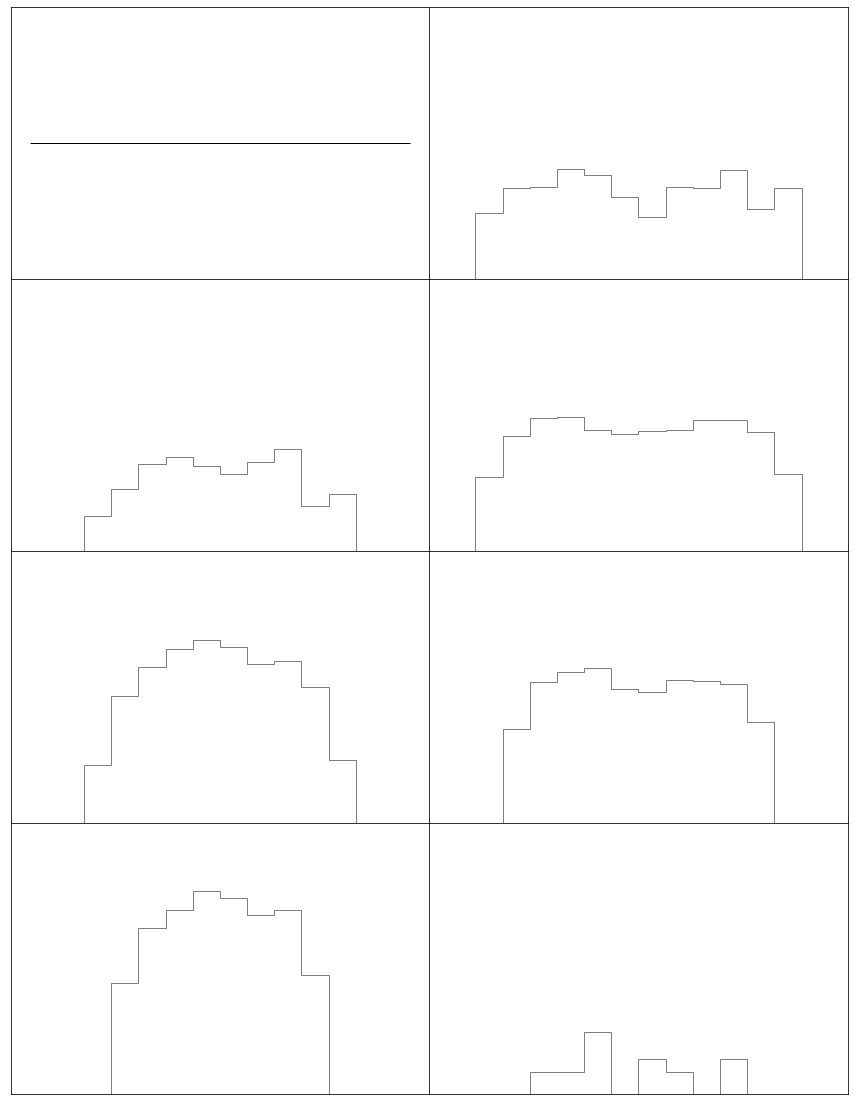

<Figure size 432x288 with 0 Axes>

In [151]:
df = onlydvcsIndvcsSimInb

for tind in range(0, len(t_edges) - 1):
    fig, axs = plt.subplots(len(Q2_edges) - 1, len(xB_edges) - 1, figsize = (15, 20))
    for xBind in range(0, len(xB_edges) - 1):
        for Q2ind in range(0, len(Q2_edges) - 1):
            plt.setp(axs[len(Q2_edges) - 2 - Q2ind,
                         xBind].get_xticklabels(), visible=False)
            plt.setp(axs[len(Q2_edges) - 2 - Q2ind,
                         xBind].get_yticklabels(), visible=False)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_title("")
            axs[len(Q2_edges) - 2 - Q2ind, xBind].xaxis.set_visible(False)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].yaxis.set_visible(False)

            df_plotted = dfInOneBin(df, xBind, Q2ind, tind)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].hist(df_plotted["phi2"],
                            bins=phi_edges, linewidth=0.5, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[len(Q2_edges)-2-Q2ind,xBind].set_xticks([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_yticks([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_xticklabels([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_yticklabels([])
            if (len(df_plotted)==0):
              continue

            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_ylim([1, 5000])
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_yscale('log')
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_title("")
            axs[len(Q2_edges) - 2 - Q2ind, xBind].xaxis.set_visible(False)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].yaxis.set_visible(False)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tick_params(axis='both', labelsize=0, length=0)
    # plt.savefig("dvcs_{}.pdf".format(tind))
    plt.show()
    plt.clf()

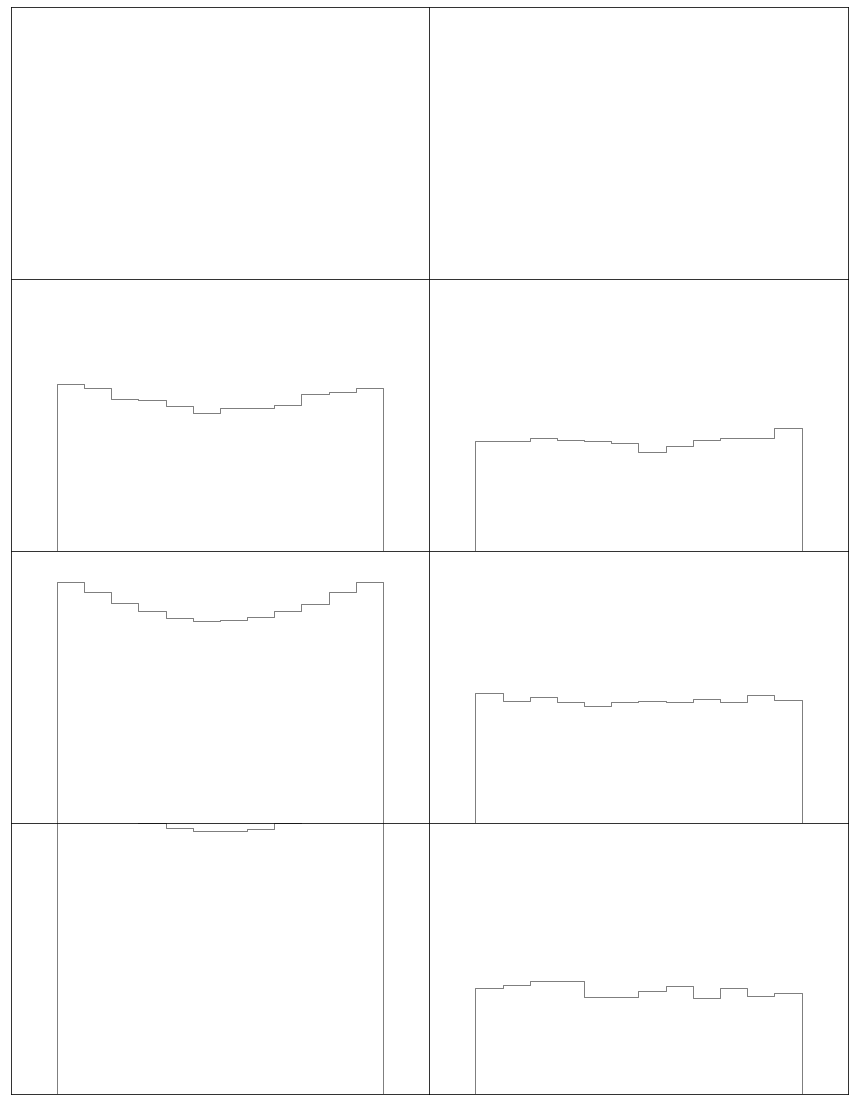

<Figure size 432x288 with 0 Axes>

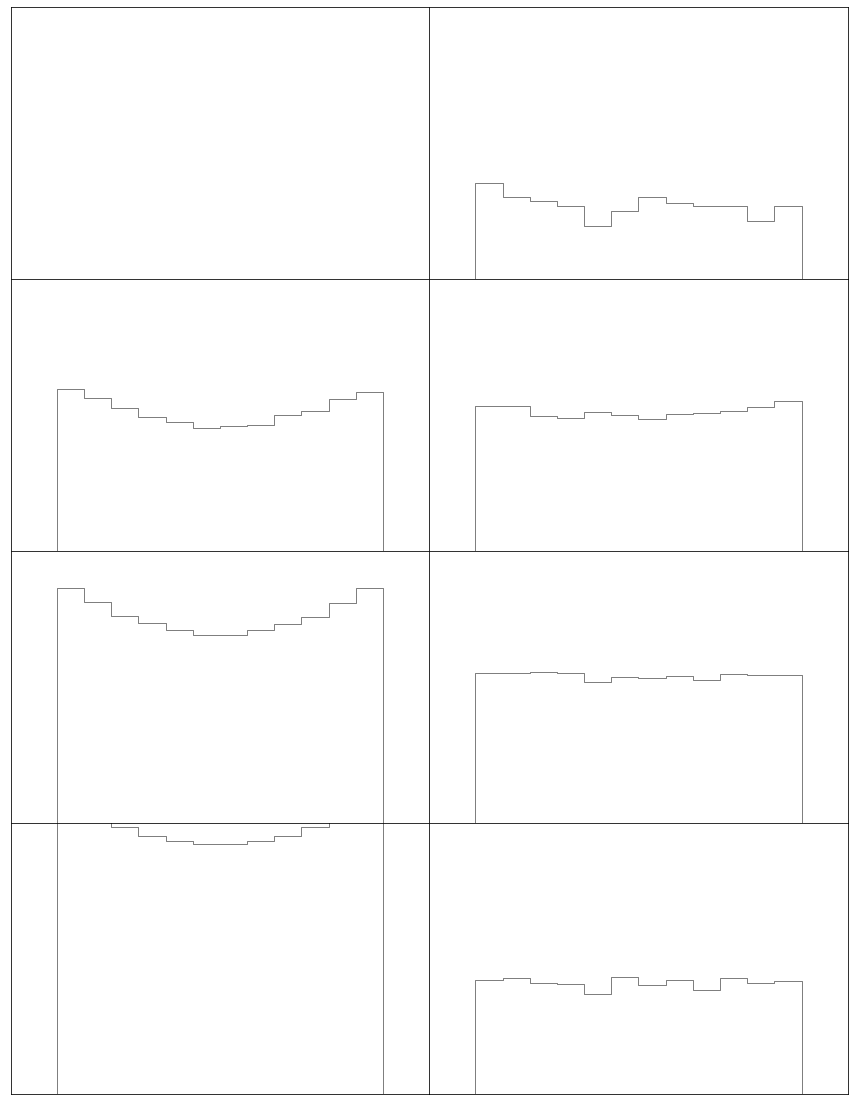

<Figure size 432x288 with 0 Axes>

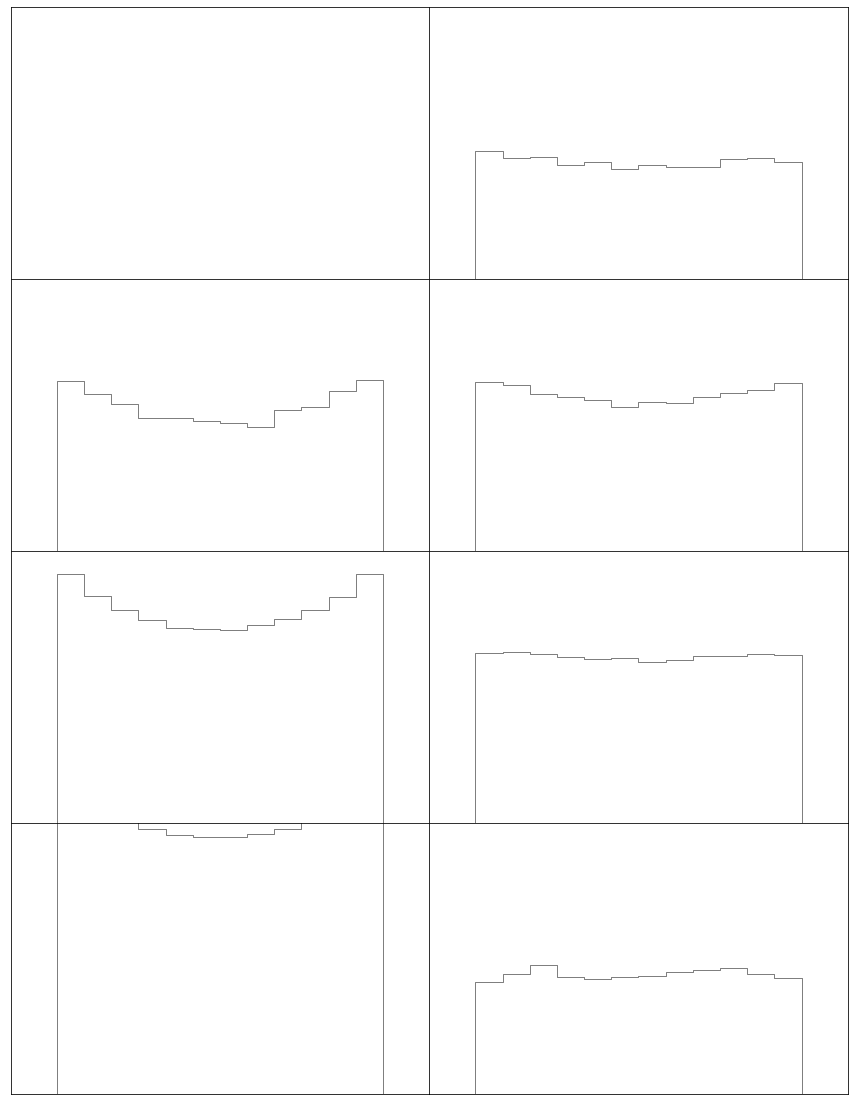

<Figure size 432x288 with 0 Axes>

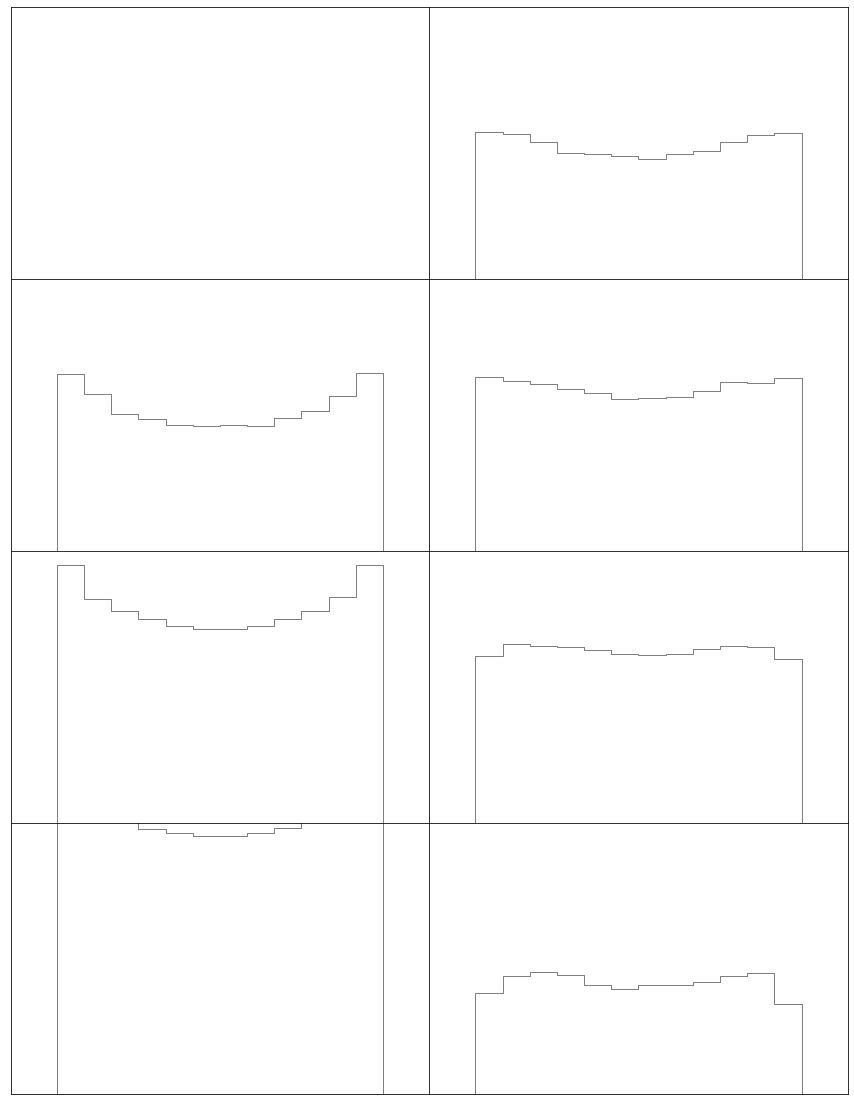

<Figure size 432x288 with 0 Axes>

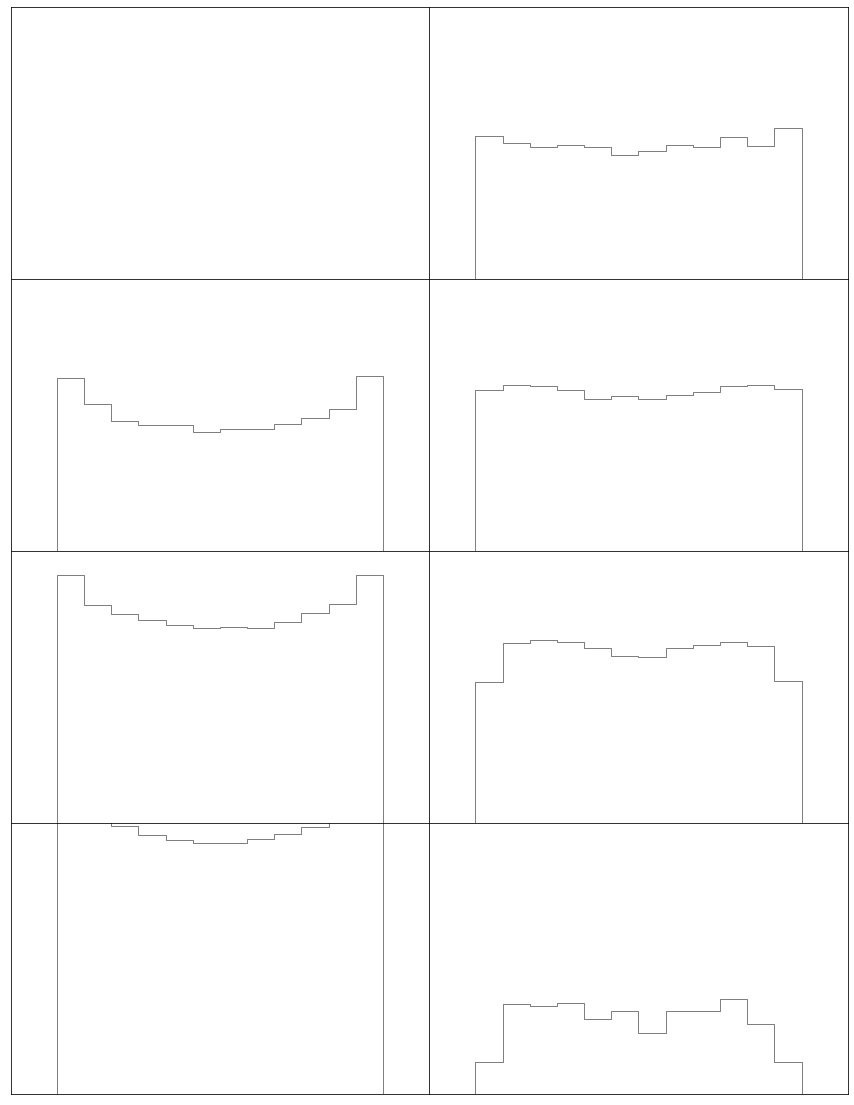

<Figure size 432x288 with 0 Axes>

In [152]:
df = dvcs_gen

for tind in range(0, len(t_edges) - 1):
    fig, axs = plt.subplots(len(Q2_edges) - 1, len(xB_edges) - 1, figsize = (15, 20))
    for xBind in range(0, len(xB_edges) - 1):
        for Q2ind in range(0, len(Q2_edges) - 1):
            plt.setp(axs[len(Q2_edges) - 2 - Q2ind,
                         xBind].get_xticklabels(), visible=False)
            plt.setp(axs[len(Q2_edges) - 2 - Q2ind,
                         xBind].get_yticklabels(), visible=False)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_title("")
            axs[len(Q2_edges) - 2 - Q2ind, xBind].xaxis.set_visible(False)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].yaxis.set_visible(False)

            binQ2lower = df["Q2"] > Q2_edges[Q2ind]
            binQ2upper = df["Q2"] < Q2_edges[Q2ind + 1]
            binxBlower = df["xB"] > xB_edges[xBind]
            binxBupper = df["xB"] < xB_edges[xBind + 1]
            bintlower = df["t2"] > t_edges[tind]
            bintupper = df["t2"] < t_edges[tind + 1]
            df_plotted = df[binQ2lower & binQ2upper &
                              binxBlower & binxBupper & bintlower & bintupper]
            axs[len(Q2_edges) - 2 - Q2ind, xBind].hist(df_plotted["phi2"],
                            bins=phi_edges, linewidth=0.5, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[len(Q2_edges)-2-Q2ind,xBind].set_xticks([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_yticks([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_xticklabels([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_yticklabels([])
            
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_ylim([1, 10000])
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_yscale('log')
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_title("")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tick_params(axis='both', labelsize=0, length=0)
    # plt.savefig("dvcs_{}.pdf".format(tind))
    plt.show()
    plt.clf()

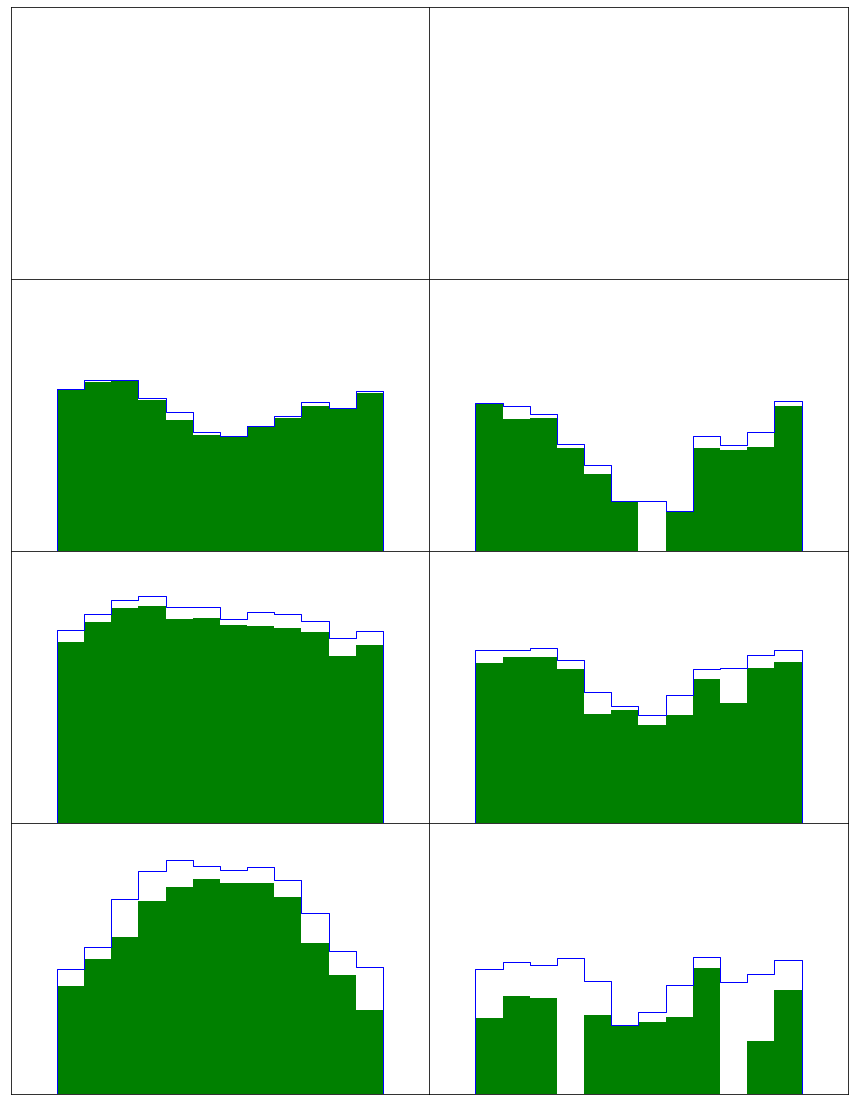

<Figure size 432x288 with 0 Axes>

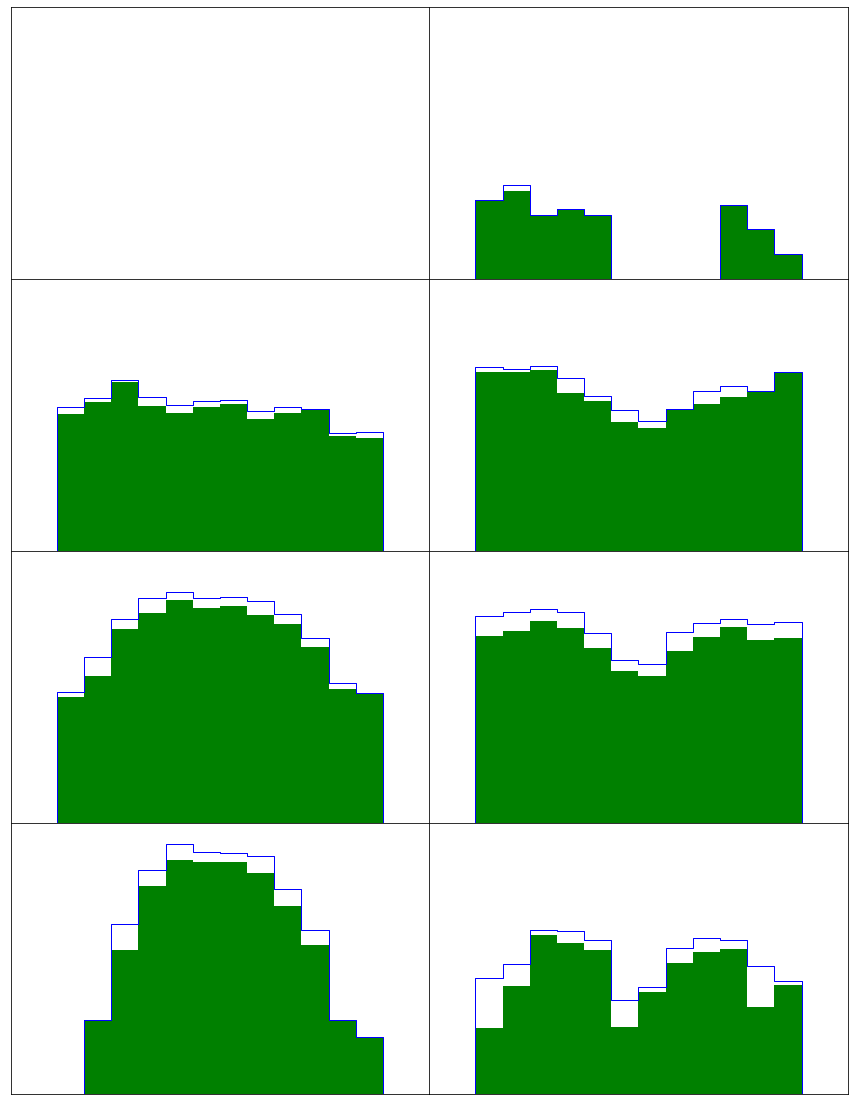

<Figure size 432x288 with 0 Axes>

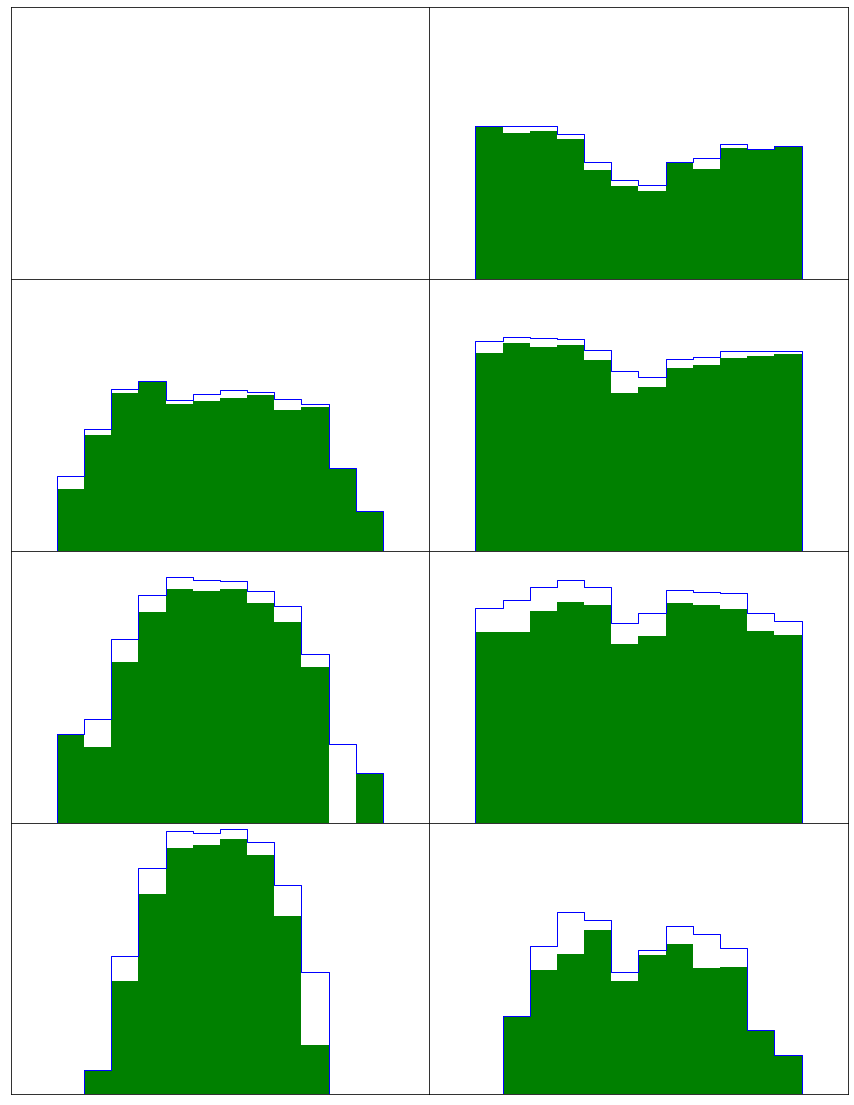

<Figure size 432x288 with 0 Axes>

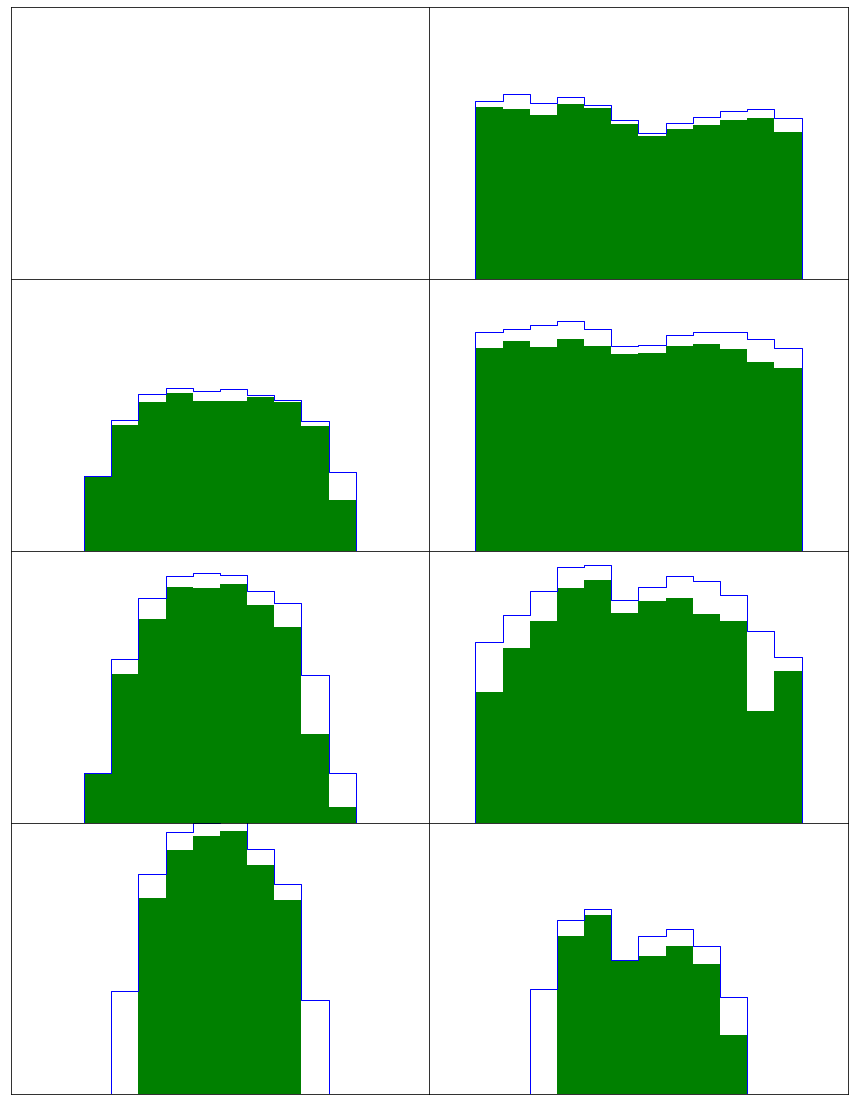

<Figure size 432x288 with 0 Axes>

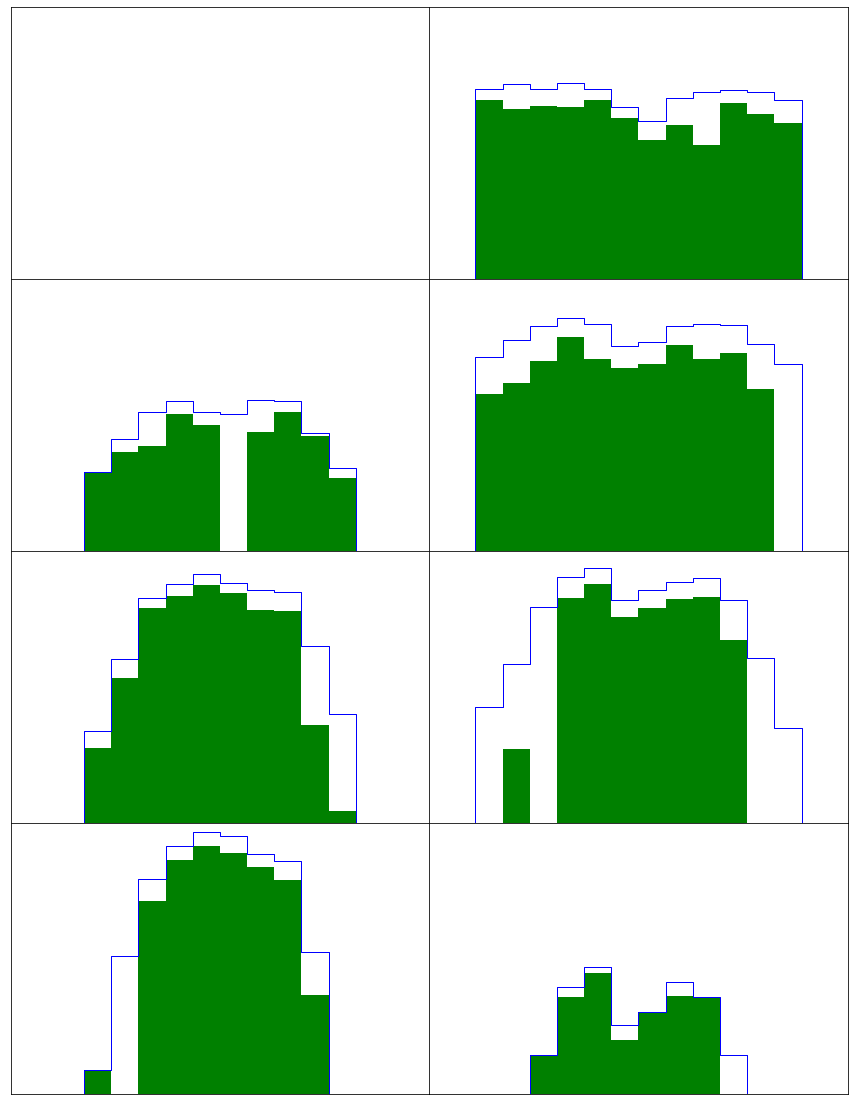

<Figure size 432x288 with 0 Axes>

In [153]:
phi_edges = np.linspace(-30, 390, 15)
a=0
for tind in range(0, len(t_edges) - 1):
    fig, axs = plt.subplots(len(Q2_edges) - 1, len(xB_edges) - 1, figsize = (15, 20))
    for xBind in range(0, len(xB_edges) - 1):
        for Q2ind in range(0, len(Q2_edges) - 1):
            plt.setp(axs[len(Q2_edges) - 2 - Q2ind,
                         xBind].get_xticklabels(), visible=False)
            plt.setp(axs[len(Q2_edges) - 2 - Q2ind,
                         xBind].get_yticklabels(), visible=False)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_title("")
            axs[len(Q2_edges) - 2 - Q2ind, xBind].xaxis.set_visible(False)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].yaxis.set_visible(False)

            df_expSig = dfInOneBin(onlydvcsIndata, xBind, Q2ind, tind)
            df_expBkg = dfInOneBin(onlydvcsIndvpi0Sim, xBind, Q2ind, tind)
            df_recSig = dfInOneBin(onlydvcsIndvcsSim, xBind, Q2ind, tind)
            df_genSig = dfInOneBin(dvcs_gen, xBind, Q2ind, tind)

            if len(df_expSig.phi2) == 0:
                continue
            dvcspi0_entries, bins = np.histogram(df_expSig.phi2, bins=phi_edges)
            pi0_entries, bins = np.histogram(df_expBkg.phi2, bins=phi_edges)
            pi0_entries = pi0_entries * cont_inb * len(onlydvcsIndata.phi2) / len(onlydvcsIndvpi0Sim.phi2)
            a+=np.sum(pi0_entries)
            Rec_entries, bins = np.histogram(df_recSig.phi2, bins=phi_edges)
            Gen_entries, bins = np.histogram(df_genSig.phi2, bins=phi_edges)
            binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                                    for i in range(len(bins) - 1)])
            axs[len(Q2_edges)-2-Q2ind,xBind].step(binscenters, dvcspi0_entries, where='mid',color='b', linewidth=1)
            axs[len(Q2_edges)-2-Q2ind,xBind].bar(binscenters, dvcspi0_entries - pi0_entries, width=np.diff(bins), color = 'g', facecolor='g')
            axs[len(Q2_edges)-2-Q2ind,xBind].set_xticks([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_yticks([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_xticklabels([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_yticklabels([])

            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_ylim([1, 2000])
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_yscale('log')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tick_params(axis='both', labelsize=0, length=0)
    # plt.savefig("dvcs_{}.pdf".format(tind))
    plt.show()
    plt.clf()

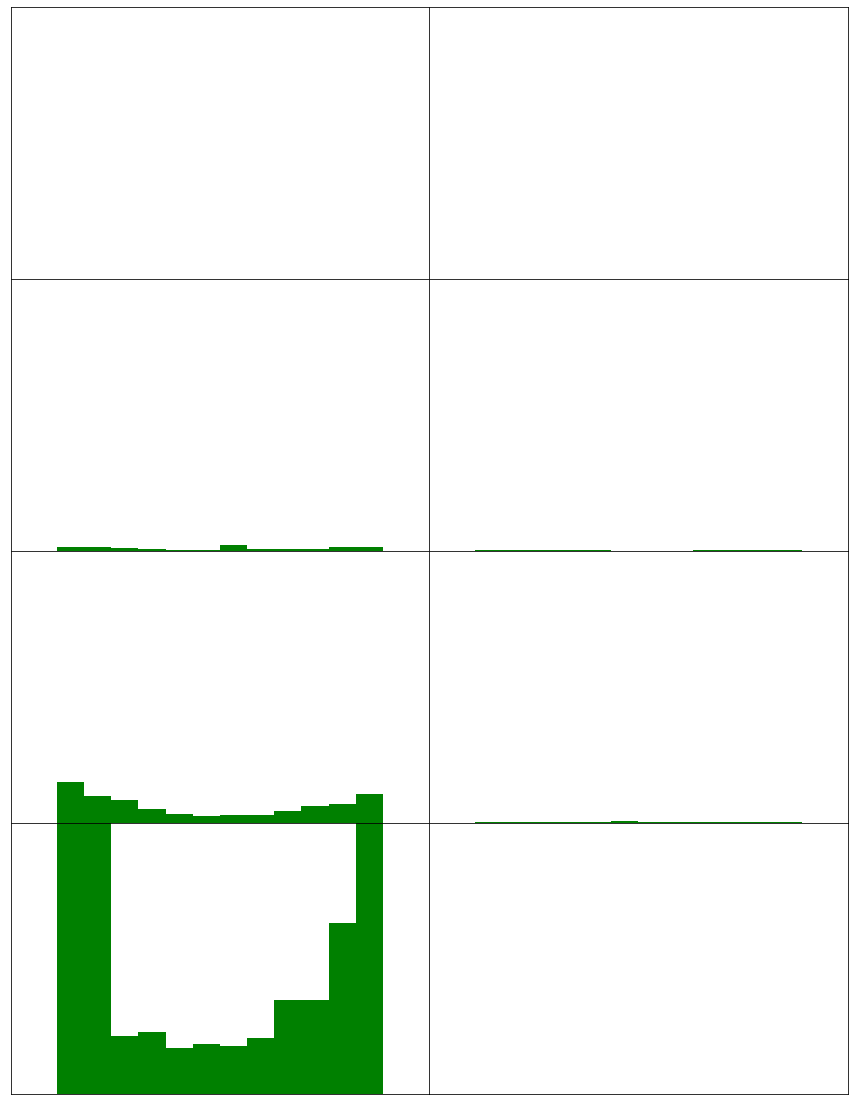

<Figure size 432x288 with 0 Axes>

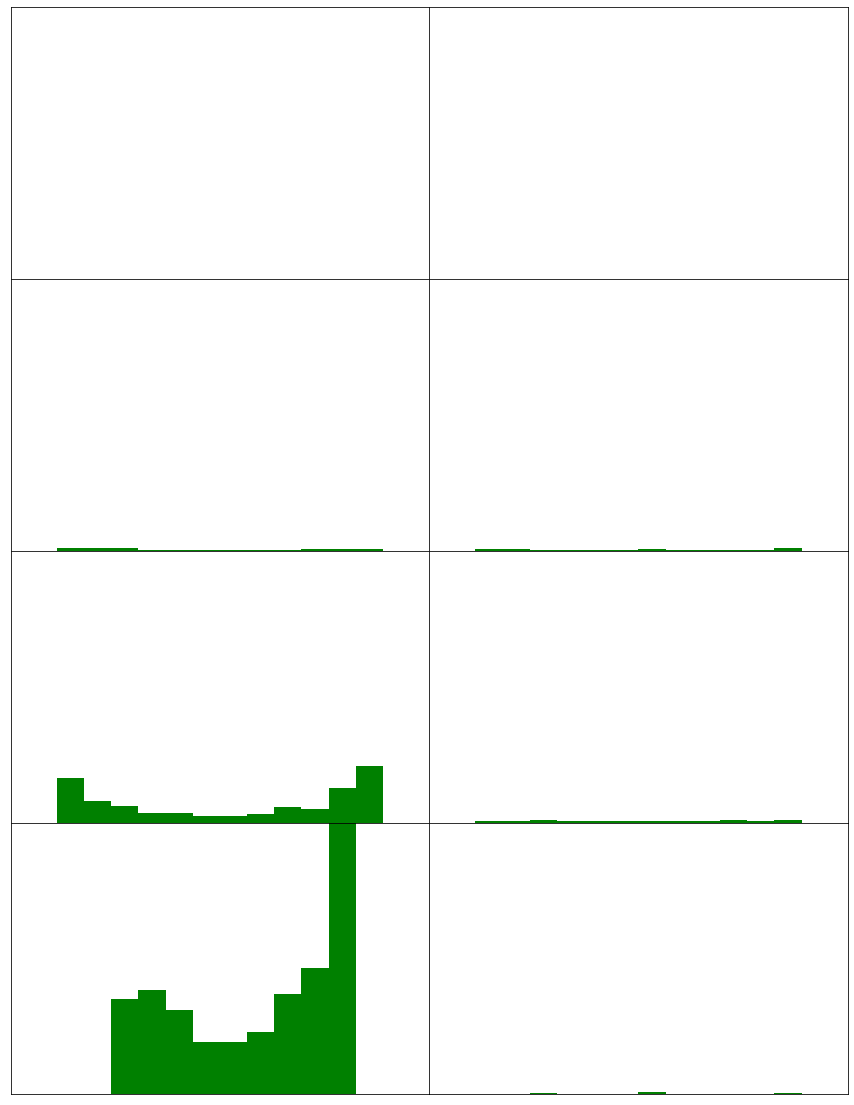

<Figure size 432x288 with 0 Axes>

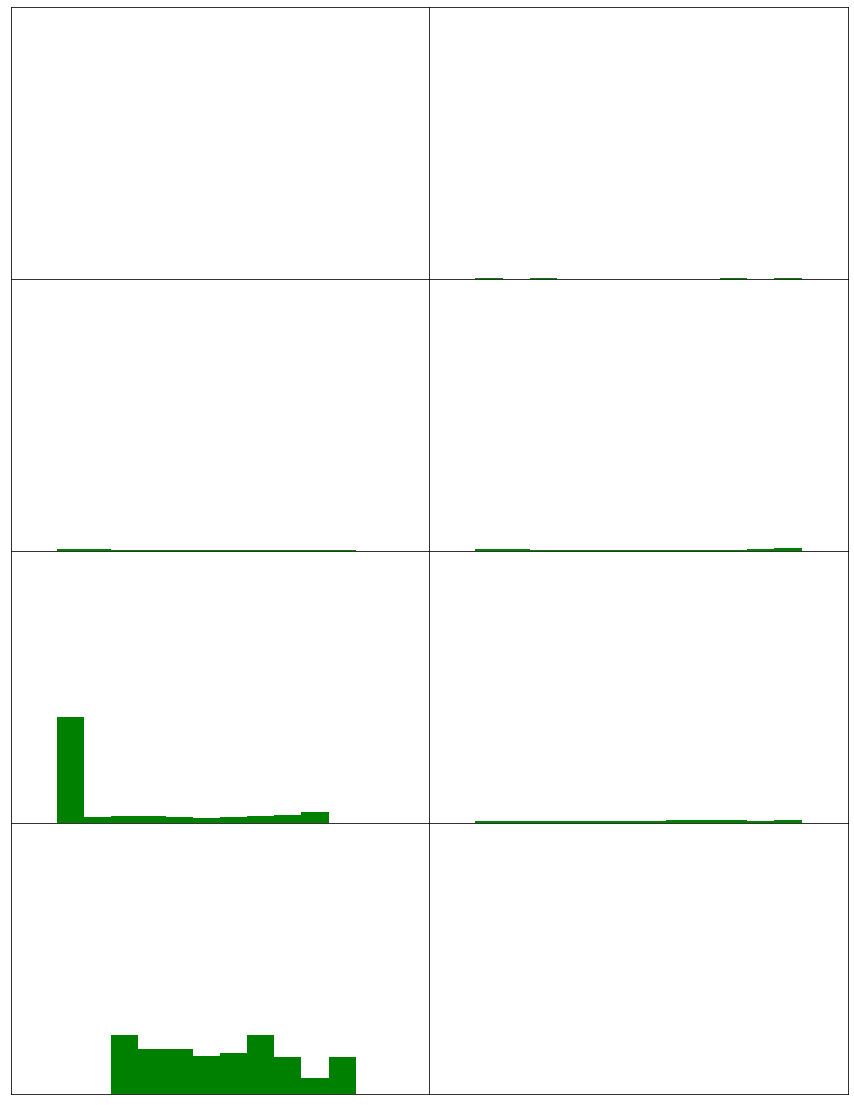

<Figure size 432x288 with 0 Axes>

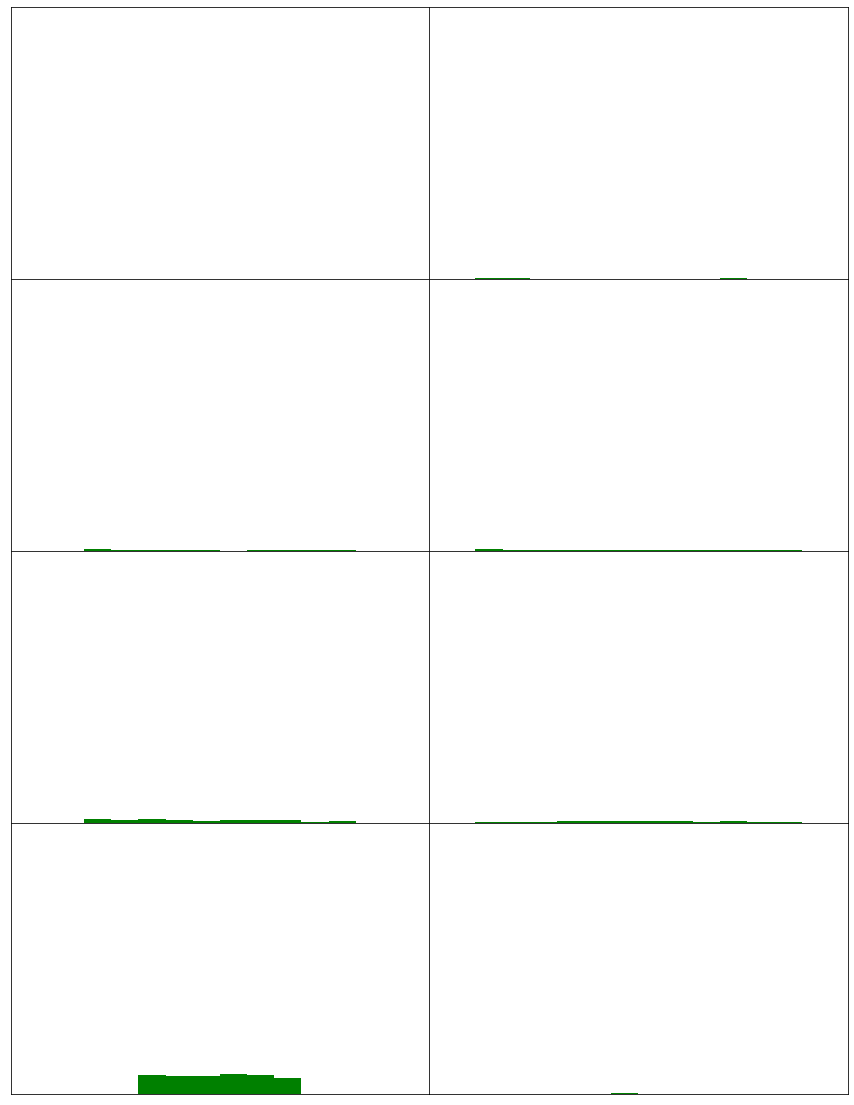

<Figure size 432x288 with 0 Axes>

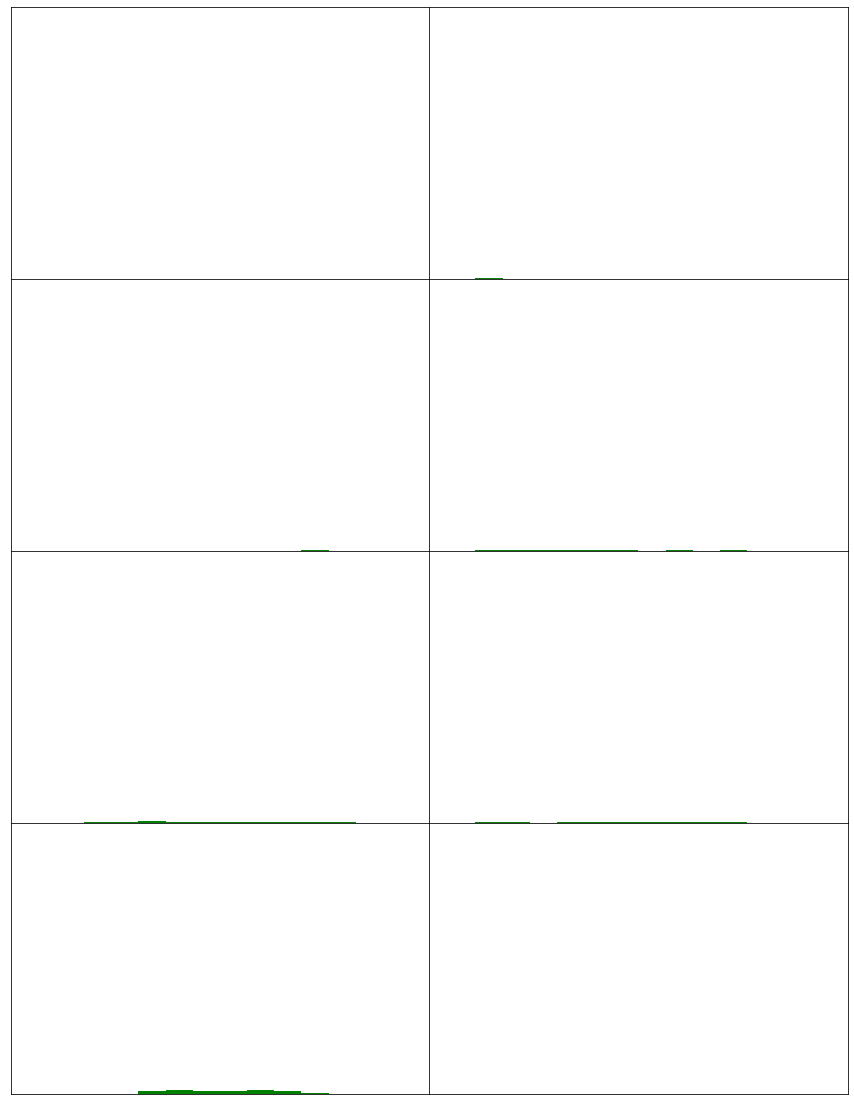

<Figure size 432x288 with 0 Axes>

In [155]:
phi_edges = np.linspace(-30, 390, 15)
a=0
for tind in range(0, len(t_edges) - 1):
    fig, axs = plt.subplots(len(Q2_edges) - 1, len(xB_edges) - 1, figsize = (15, 20))
    for xBind in range(0, len(xB_edges) - 1):
        for Q2ind in range(0, len(Q2_edges) - 1):
            plt.setp(axs[len(Q2_edges) - 2 - Q2ind,
                         xBind].get_xticklabels(), visible=False)
            plt.setp(axs[len(Q2_edges) - 2 - Q2ind,
                         xBind].get_yticklabels(), visible=False)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].xaxis.set_visible(False)
            axs[len(Q2_edges) - 2 - Q2ind, xBind].yaxis.set_visible(False)

            df_expSig = dfInOneBin(onlydvcsIndata, xBind, Q2ind, tind)
            df_expBkg = dfInOneBin(onlydvcsIndvpi0Sim, xBind, Q2ind, tind)
            df_recSig = dfInOneBin(onlydvcsIndvcsSim, xBind, Q2ind, tind)
            df_genSig = dfInOneBin(dvcs_gen, xBind, Q2ind, tind)

            if len(df_expSig.phi2) == 0:
                continue
            dvcspi0_entries, bins = np.histogram(df_expSig.phi2, bins=phi_edges)
            pi0_entries, bins = np.histogram(df_expBkg.phi2, bins=phi_edges)
            pi0_entries = pi0_entries * cont_inb * len(onlydvcsIndata.phi2) / len(onlydvcsIndvpi0Sim.phi2)
            a+=np.sum(pi0_entries)
            Rec_entries, bins = np.histogram(df_recSig.phi2, bins=phi_edges)
            Gen_entries, bins = np.histogram(df_genSig.phi2, bins=phi_edges)
            binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                                    for i in range(len(bins) - 1)])

            acc = copy(Rec_entries.astype(float))
            for ind, val in enumerate(acc):
                if (ind == 0) or (ind==13):
                    acc[ind] = 0
                    continue
                if Gen_entries[ind] == 0:
                    acc[ind] = 0
                    continue
                acc[ind] = float(Rec_entries[ind])/ float(Gen_entries[ind])

            accCorrectedData = (dvcspi0_entries - pi0_entries)
            for ind, val in enumerate(acc):
                if (ind == 0) or (ind==13):
                    continue
                if val == 0:
                    accCorrectedData[ind] = 0
                    continue
                accCorrectedData[ind] = accCorrectedData[ind]/acc[ind]
                
                        
#             axs[len(Q2_edges)-2-Q2ind,xBind].step(binscenters, dvcspi0_entries, where='mid',color='b', linewidth=1)
            axs[len(Q2_edges)-2-Q2ind,xBind].bar(binscenters, accCorrectedData/56.5/(xB_edges[xBind+1]-xB_edges[xBind])/(Q2_edges[Q2ind+1]-Q2_edges[Q2ind])/(t_edges[tind+1] -t_edges[tind])/(np.pi*2/30)/10**6, width=np.diff(bins), color = 'g', facecolor='g')
            axs[len(Q2_edges)-2-Q2ind,xBind].set_xticks([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_yticks([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_xticklabels([])
            axs[len(Q2_edges)-2-Q2ind,xBind].set_yticklabels([])

            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_ylim([0, 0.1])
#             axs[len(Q2_edges) - 2 - Q2ind, xBind].set_yscale('log')
            axs[len(Q2_edges) - 2 - Q2ind, xBind].set_title("")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tick_params(axis='both', labelsize=0, length=0)
    # plt.savefig("dvcs_{}.pdf".format(tind))
    plt.show()
    plt.clf()

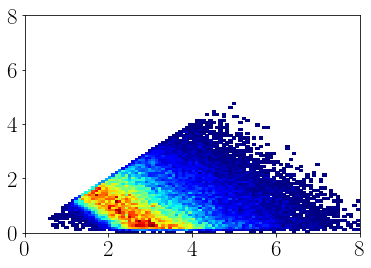

In [178]:
plt.hist2d(dvpi0Indvpi0SimInb.Gp, dvpi0Indvpi0SimInb.Gp2, cmap = cmap, cmin = 1, bins = [np.linspace(0, 8, 101), np.linspace(0,8, 101)])
plt.show()

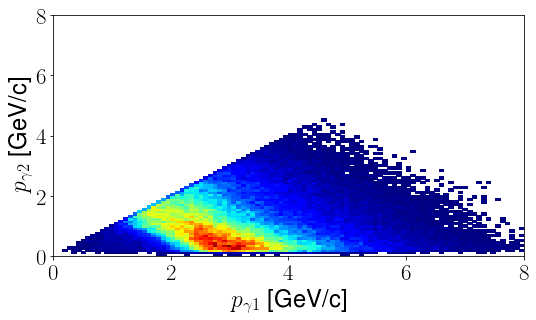

In [182]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.hist2d(dvpi0IndataInb.Gp, dvpi0IndataInb.Gp2, cmap = cmap, cmin = 1, bins = [np.linspace(0, 8, 101), np.linspace(0,8, 101)])
ax.set_xlabel(r"$p_{\gamma1}$" + " ["+GeVc+"]")
ax.set_ylabel(r"$p_{\gamma2}$" + " ["+GeVc+"]")
plt.tight_layout()
plt.savefig("analysisnote/pi0phasespace.pdf")